# Tabular Playground Series - July 2022
Authors:
- Vadym Repetsky
- Krzysztof Szala 

In [176]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, SelectKBest # 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.stats import pearsonr

In [31]:
data = pd.read_csv("data/data.csv", index_col=0)
data.head()

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389420 -0.912791  0.648951  0.589045 -0.830817  0.733624  2.258560   
1  -0.689249 -0.453954  0.654175  0.995248 -1.653020  0.863810 -0.090651   
2   0.809079  0.324568 -1.170602 -0.624491  0.105448  0.783948  1.988301   
3  -0.500923  0.229049  0.264109  0.231520  0.415012 -1.221269  0.138850   
4  -0.671268 -1.039533 -0.270155 -1.830264 -0.290108 -1.852809  0.781898   

    f_07  f_08  f_09  ...      f_19      f_20      f_21      f_22      f_23  \
id                    ...                                                     
0      2    13    14  ... -0.478412 -0.757002 -0.763635 -1.090369  1.142641   
1      2     3     6  ... -0.428791 -0.089908 -1.784204 -0.839474  0.459685   
2      5    11     5  ... -0.413534 -1.602377  1.190984  3.267116 -0.088322   
3      6     2    13  ...  0.619283  1.287801  0.532837  1.036631 -2.041828   
4      8     7     5  ... -1.628830 -0.434948  0.322505  0.284326 -2.438365   

        f_24      f_25      f_26      f_27      f_28  
id                                                    
0  -0.884274  1.137896  1.309073  1.463002  0.813527  
1   1.759412 -0.275422 -0.852168  0.562457 -2.680541  
2  -2.168635 -0.974989  1.335763 -1.110655 -3.630723  
3   1.440490 -1.900191 -0.630771 -0.050641  0.238333  
4   1.473930 -1.044684  1.602686 -0.405263 -1.987263  

[5 rows x 29 columns]

In [3]:
sample = pd.read_csv("data/sample_submission.csv", index_col=0)
data.head()

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389420 -0.912791  0.648951  0.589045 -0.830817  0.733624  2.258560   
1  -0.689249 -0.453954  0.654175  0.995248 -1.653020  0.863810 -0.090651   
2   0.809079  0.324568 -1.170602 -0.624491  0.105448  0.783948  1.988301   
3  -0.500923  0.229049  0.264109  0.231520  0.415012 -1.221269  0.138850   
4  -0.671268 -1.039533 -0.270155 -1.830264 -0.290108 -1.852809  0.781898   

    f_07  f_08  f_09  ...      f_19      f_20      f_21      f_22      f_23  \
id                    ...                                                     
0      2    13    14  ... -0.478412 -0.757002 -0.763635 -1.090369  1.142641   
1      2     3     6  ... -0.428791 -0.089908 -1.784204 -0.839474  0.459685   
2      5    11     5  ... -0.413534 -1.602377  1.190984  3.267116 -0.088322   
3      6     2    13  ...  0.619283  1.287801  0.532837  1.036631 -2.041828   
4      8     7     5  ... -1.628830 -0.434948  0.322505  0.284326 -2.438365   

        f_24      f_25      f_26      f_27      f_28  
id                                                    
0  -0.884274  1.137896  1.309073  1.463002  0.813527  
1   1.759412 -0.275422 -0.852168  0.562457 -2.680541  
2  -2.168635 -0.974989  1.335763 -1.110655 -3.630723  
3   1.440490 -1.900191 -0.630771 -0.050641  0.238333  
4   1.473930 -1.044684  1.602686 -0.405263 -1.987263  

[5 rows x 29 columns]

<Axes: >

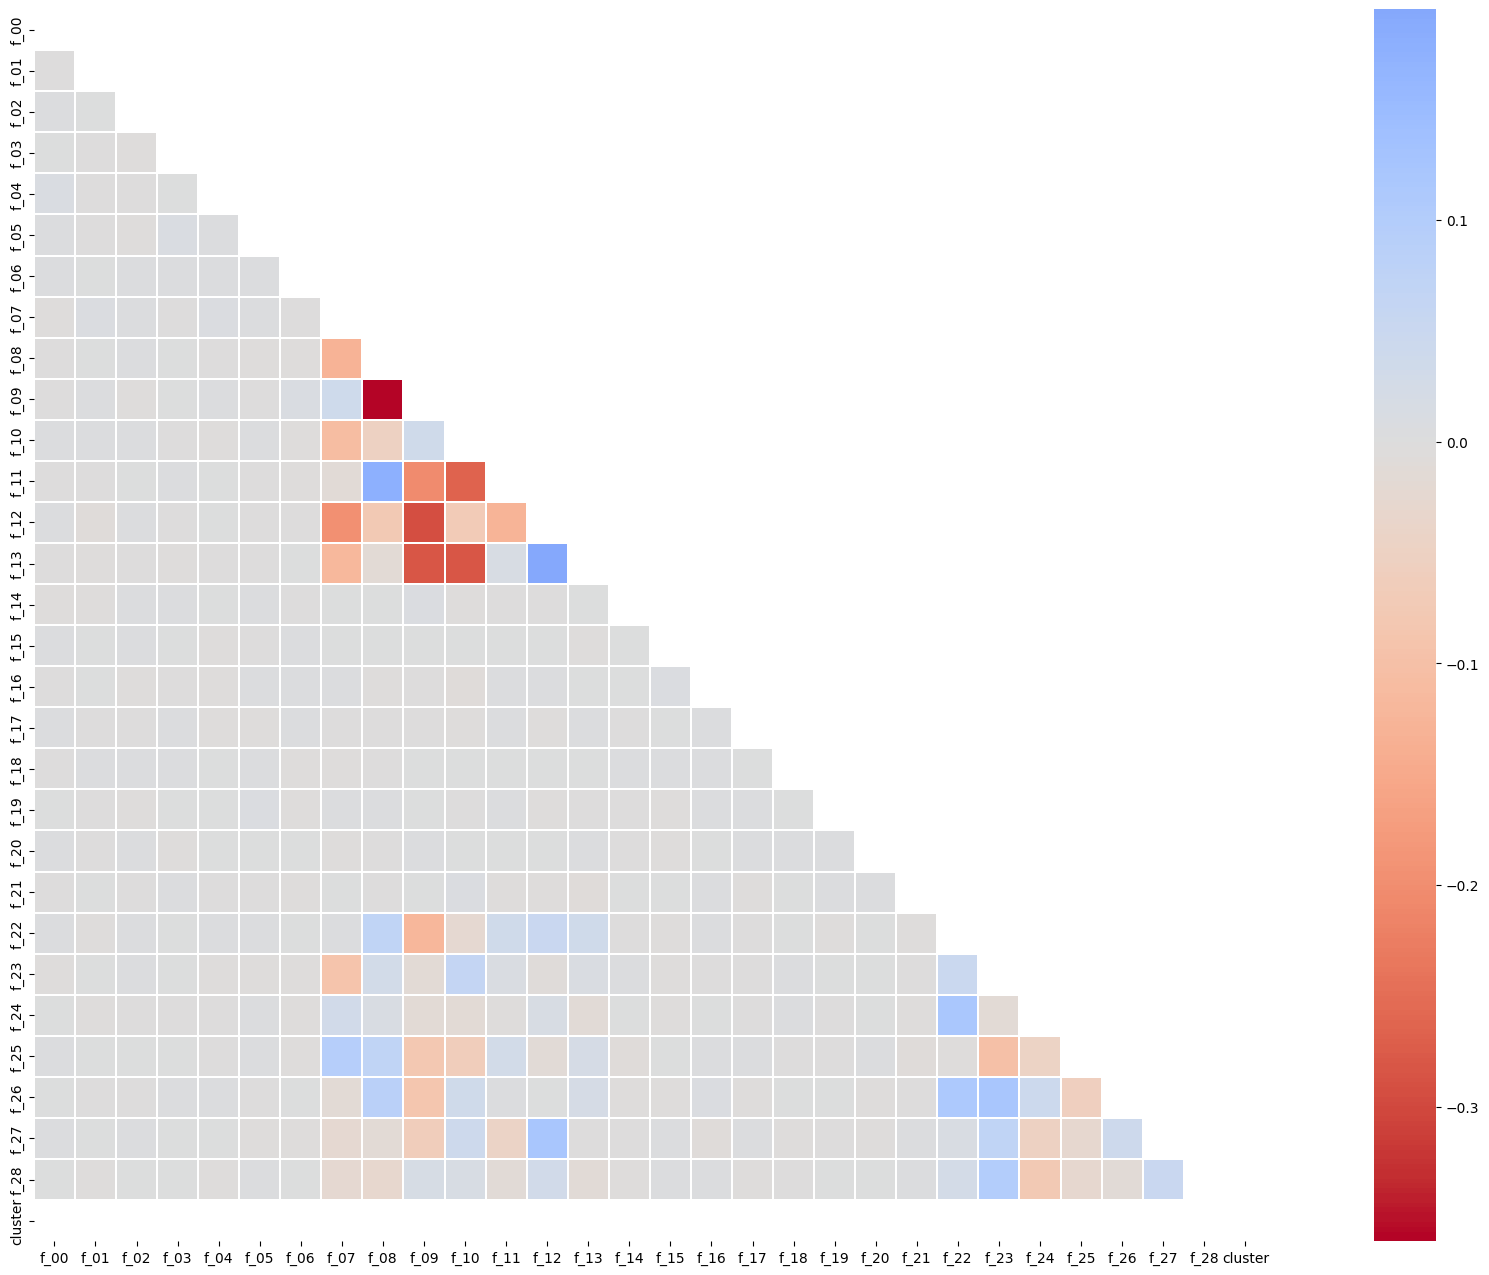

In [114]:
fig, ax = plt.subplots(figsize=(28,16))
corr_mat = data.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, mask=mask, square=True, ax=ax, linewidths=0.1,center=0, cmap='coolwarm_r')

F_08 and F_09 seems to be correlated a little bit too much  

IndexError: index 28 is out of bounds for axis 0 with size 28

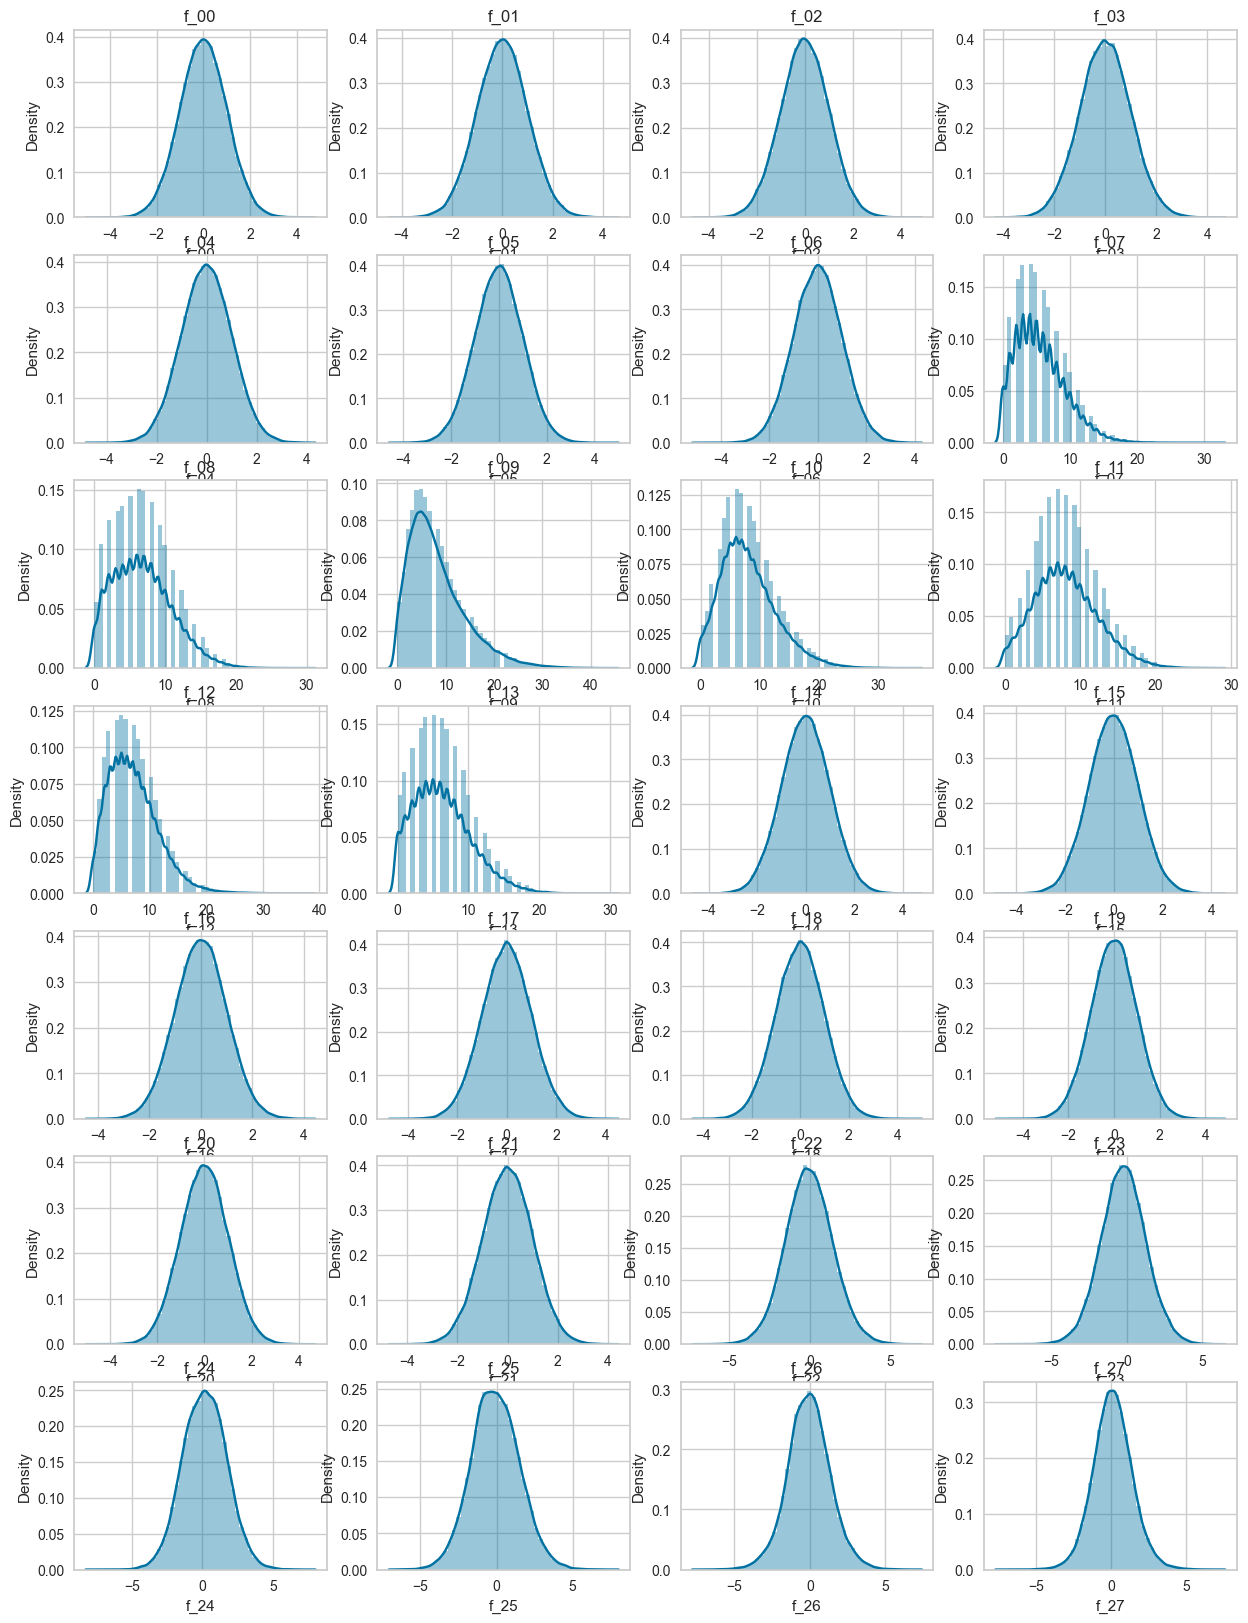

In [118]:
# Looking at the distribution of the data, specific features one-by-one
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(7, 4, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(data.columns):
    sns.distplot(data[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


C:\Users\Krzychu\AppData\Local\Temp\ipykernel_16212\44270917.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['f_28'])


<Axes: xlabel='f_28', ylabel='Density'>

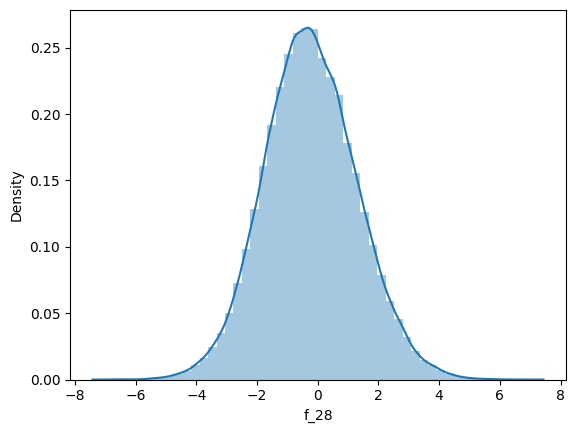

In [23]:
sns.distplot(data['f_28'])

As we can see, we can divide features and their plots into two categories:
- skewed - (7,13)
- Gaussian - rest

##  Set of normalization schemas

- Log Normalization:

Appropriate when the data has a skewed distribution, such as exponential or power-law distributions.

- L1 Normalization (Least Absolute Deviations):

Suitable when the data contains outliers or is not normally distributed.
Helps to minimize the influence of extreme values by dividing each data point by the sum of its absolute values.

- L2 Normalization (Least Squares):

Beneficial when the magnitude of the features is important.

- Standardization (Z-score scaling):

Useful when the distribution of the data is expected to be Gaussian (or approximately Gaussian).

- Min-Max Normalization:

Suitable when the data needs to be scaled to a specific range, typically between 0 and 1.

In [5]:
# data normalization (min-max normalization)

data_norm_min_max = (data - data.min()) / (data.max() - data.min())
data_norm_min_max.head()
data_norm_min_max.describe()

f_00          f_01          f_02          f_03          f_04  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean       0.513236      0.493491      0.489633      0.476817      0.527853   
std        0.108731      0.117351      0.112045      0.118953      0.116819   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.439891      0.414154      0.414471      0.396933      0.448776   
50%        0.513323      0.493616      0.489713      0.476522      0.527878   
75%        0.586539      0.572312      0.565509      0.556815      0.607177   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               f_05          f_06         f_07          f_08          f_09  \
count  98000.000000  98000.000000  98000.00000  98000.000000  98000.000000   
mean       0.477096      0.550030      0.17331      0.225435      0.186208   
std        0.111033      0.112158      0.11537      0.138412      0.134203   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%        0.402360      0.473861      0.09375      0.133333      0.090909   
50%        0.477389      0.550141      0.15625      0.200000      0.159091   
75%        0.551999      0.625499      0.25000      0.300000      0.250000   
max        1.000000      1.000000      1.00000      1.000000      1.000000   

       ...          f_19          f_20          f_21          f_22  \
count  ...  98000.000000  98000.000000  98000.000000  98000.000000   
mean   ...      0.517200      0.518169      0.517459      0.510408   
std    ...      0.106229      0.109834      0.116603      0.110356   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.445886      0.443784      0.438906      0.436914   
50%    ...      0.517616      0.518138      0.517749      0.509069   
75%    ...      0.588769      0.592193      0.596604      0.582760   
max    ...      1.000000      1.000000      1.000000      1.000000   

               f_23          f_24          f_25          f_26          f_27  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean       0.560867      0.519516      0.461824      0.508519      0.511227   
std        0.104613      0.100721      0.111474      0.099299      0.089771   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.492059      0.449683      0.386522      0.445024      0.453121   
50%        0.560934      0.519558      0.459355      0.507941      0.510111   
75%        0.629779      0.588121      0.536230      0.571500      0.568088   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               f_28  
count  98000.000000  
mean       0.482600  
std        0.109715  
min        0.000000  
25%        0.408544  
50%        0.479699  
75%        0.554483  
max        1.000000  

[8 rows x 29 columns]

In [7]:
# data (z-score normalization)

data_norm_z_score = (data - data.mean()) / data.std()
data_norm_z_score.describe()

f_00          f_01          f_02          f_03          f_04  \
count  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04   
mean  -2.958178e-17 -2.987180e-17 -2.204133e-17 -5.220314e-18  1.703852e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.720234e+00 -4.205255e+00 -4.369978e+00 -4.008433e+00 -4.518549e+00   
25%   -6.745561e-01 -6.760634e-01 -6.708165e-01 -6.715564e-01 -6.769154e-01   
50%    8.003339e-04  1.070092e-03  7.166146e-04 -2.483472e-03  2.138079e-04   
75%    6.741632e-01  6.716680e-01  6.771977e-01  6.725128e-01  6.790321e-01   
max    4.476763e+00  4.316193e+00  4.555035e+00  4.398216e+00  4.041698e+00   

               f_05          f_06          f_07          f_08          f_09  \
count  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04   
mean   1.769106e-17  2.900174e-18 -9.019542e-17 -4.857792e-17  5.510331e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.296871e+00 -4.904069e+00 -1.502210e+00 -1.628732e+00 -1.387515e+00   
25%   -6.730962e-01 -6.791225e-01 -6.896069e-01 -6.654214e-01 -7.101136e-01   
50%    2.634601e-03  9.909674e-04 -1.478716e-01 -1.837662e-01 -2.020626e-01   
75%    6.745973e-01  6.728807e-01  6.647313e-01  5.387166e-01  4.753388e-01   
max    4.709424e+00  4.011933e+00  7.165554e+00  5.596096e+00  6.063900e+00   

       ...          f_19          f_20          f_21          f_22  \
count  ...  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04   
mean   ...  1.580595e-17 -5.655340e-18 -1.406585e-17  7.105427e-18   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -4.868728e+00 -4.717746e+00 -4.437779e+00 -4.625104e+00   
25%    ... -6.713255e-01 -6.772557e-01 -6.736769e-01 -6.659722e-01   
50%    ...  3.908479e-03 -2.894663e-04  2.489450e-03 -1.213590e-02   
75%    ...  6.737164e-01  6.739563e-01  6.787532e-01  6.556179e-01   
max    ...  4.544891e+00  4.386895e+00  4.138319e+00  4.436470e+00   

               f_23          f_24          f_25          f_26          f_27  \
count  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04   
mean  -1.377583e-17  1.935866e-17 -7.830471e-18 -3.625218e-18  4.350262e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -5.361327e+00 -5.157955e+00 -4.142880e+00 -5.121077e+00 -5.694797e+00   
25%   -6.577323e-01 -6.933303e-01 -6.755071e-01 -6.394290e-01 -6.472781e-01   
50%    6.397874e-04  4.149096e-04 -2.215128e-02 -5.820515e-03 -1.244209e-02   
75%    6.587295e-01  6.811337e-01  6.674719e-01  6.342556e-01  6.333912e-01   
max    4.197675e+00  4.770428e+00  4.827809e+00  4.949493e+00  5.444661e+00   

               f_28  
count  9.800000e+04  
mean  -1.319579e-17  
std    1.000000e+00  
min   -4.398657e+00  
25%   -6.749834e-01  
50%   -2.643715e-02  
75%    6.551792e-01  
max    4.715848e+00  

[8 rows x 29 columns]

In [8]:
# data (log normalization)

data_norm_log = np.log(data + 1)
data_norm_log.describe()


C:\Users\Krzychu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


f_00          f_01          f_02          f_03          f_04  \
count  82474.000000  82527.000000  82357.000000  82513.000000  82176.000000   
mean      -0.036217     -0.031668     -0.030473     -0.036959     -0.033815   
std        0.940685      0.932409      0.927134      0.931559      0.934309   
min      -10.177481     -9.803956    -10.131212    -10.049657     -9.328124   
25%       -0.410825     -0.400487     -0.402411     -0.414655     -0.411499   
50%        0.183761      0.188140      0.183850      0.183472      0.185414   
75%        0.593033      0.591655      0.590974      0.588019      0.594031   
max        1.703023      1.672408      1.715643      1.686283      1.619497   

               f_05          f_06          f_07          f_08          f_09  \
count  82291.000000  82391.000000  98000.000000  98000.000000  98000.000000   
mean      -0.033265     -0.039205      1.693434      1.870648      1.995896   
std        0.933115      0.934293      0.657767      0.656298      0.715267   
min      -10.249021     -9.463401      0.000000      0.000000      0.000000   
25%       -0.403649     -0.412973      1.386294      1.609438      1.609438   
50%        0.182981      0.180782      1.791759      1.945910      2.079442   
75%        0.592834      0.588869      2.197225      2.302585      2.484907   
max        1.742274      1.609157      3.496508      3.433987      3.806662   

       ...          f_19          f_20          f_21          f_22  \
count  ...  82204.000000  82230.000000  82361.000000  72995.000000   
mean   ...     -0.032952     -0.031803     -0.032319      0.122910   
std    ...      0.932224      0.929602      0.927511      1.009347   
min    ...    -10.056823     -8.706541     -9.328124    -12.134903   
25%    ...     -0.406756     -0.405755     -0.406616     -0.317227   
50%    ...      0.184675      0.187437      0.187255      0.349200   
75%    ...      0.590146      0.593636      0.592393      0.812038   
max    ...      1.715643      1.686283      1.636161      2.017263   

               f_23          f_24          f_25          f_26          f_27  \
count  69068.000000  75477.000000  70586.000000  74084.000000  79405.000000   
mean       0.051641      0.246278      0.144332      0.067901      0.109810   
std        1.042262      0.999592      1.052371      1.028221      0.964497   
min       -9.938366     -9.280238    -10.495974    -11.039021     -9.131971   
25%       -0.391167     -0.155688     -0.303602     -0.362807     -0.291317   
50%        0.287415      0.490882      0.394984      0.298759      0.320679   
75%        0.760529      0.919704      0.862471      0.758904      0.756264   
max        1.953713      2.143269      2.145315      2.080142      2.104862   

               f_28  
count  67610.000000  
mean       0.056920  
std        1.062890  
min      -10.228023  
25%       -0.410350  
50%        0.296648  
75%        0.790682  
max        2.076581  

[8 rows x 29 columns]

In [9]:
# data normalization by L1 norm

data_norm_L1 = data / data.sum()
data_norm_L1.describe()

f_00          f_01          f_02          f_03          f_04  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean       0.000010      0.000010      0.000010      0.000010      0.000010   
std        0.008390      0.001830      0.009808      0.014580      0.002906   
min       -0.039591     -0.007686     -0.044665     -0.064114     -0.011736   
25%       -0.005649     -0.001227     -0.006632     -0.009795     -0.001963   
50%        0.000017      0.000012      0.000003      0.000046      0.000010   
75%        0.005666      0.001239      0.006589      0.009801      0.001977   
max        0.037569      0.007910      0.042870      0.058452      0.013142   

               f_05          f_06          f_07          f_08          f_09  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean       0.000010      0.000010      0.000010      0.000010      0.000010   
std        0.006334      0.003346      0.000007      0.000006      0.000007   
min       -0.029820     -0.013415      0.000000      0.000000      0.000000   
25%       -0.004263     -0.002241      0.000006      0.000006      0.000005   
50%       -0.000006      0.000007      0.000009      0.000009      0.000009   
75%        0.004274      0.002283      0.000015      0.000014      0.000014   
max        0.027227      0.016420      0.000059      0.000045      0.000055   

       ...          f_19          f_20          f_21          f_22  \
count  ...  98000.000000  98000.000000  98000.000000  98000.000000   
mean   ...      0.000010      0.000010      0.000010      0.000010   
std    ...      0.002271      0.019857      0.006108      0.000389   
min    ...     -0.010312     -0.087102     -0.025268     -0.001716   
25%    ...     -0.001520     -0.013373     -0.004136     -0.000245   
50%    ...      0.000001      0.000016     -0.000005      0.000015   
75%    ...      0.001535      0.013459      0.004125      0.000269   
max    ...      0.011068      0.093692      0.027118      0.001810   

               f_23          f_24          f_25          f_26          f_27  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean       0.000010      0.000010      0.000010      0.000010      0.000010   
std        0.000069      0.000095      0.000250      0.000233      0.000135   
min       -0.000281     -0.000478     -0.001197     -0.001143     -0.000760   
25%       -0.000035     -0.000055     -0.000157     -0.000138     -0.000077   
50%        0.000010      0.000010      0.000016      0.000012      0.000009   
75%        0.000056      0.000075      0.000179      0.000159      0.000096   
max        0.000382      0.000461      0.001046      0.001203      0.000747   

               f_28  
count  98000.000000  
mean       0.000010  
std        0.000068  
min       -0.000308  
25%       -0.000034  
50%        0.000012  
75%        0.000056  
max        0.000307  

[8 rows x 29 columns]

In [10]:
# data normalization by L2 norm

data_norm_L2 = data / np.sqrt((data ** 2).sum())
data_norm_L2.describe()

f_00          f_01          f_02          f_03          f_04  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean       0.000004      0.000018     -0.000003     -0.000002     -0.000011   
std        0.003194      0.003194      0.003194      0.003194      0.003194   
min       -0.015074     -0.013415     -0.013963     -0.012807     -0.014445   
25%       -0.002151     -0.002142     -0.002146     -0.002147     -0.002174   
50%        0.000006      0.000021     -0.000001     -0.000010     -0.000011   
75%        0.002157      0.002163      0.002160      0.002146      0.002158   
max        0.014304      0.013805      0.014547      0.014047      0.012900   

               f_05          f_06          f_07          f_08          f_09  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean      -0.000005     -0.000010      0.002659      0.002722      0.002591   
std        0.003194      0.003194      0.001770      0.001671      0.001868   
min       -0.013731     -0.015675      0.000000      0.000000      0.000000   
25%       -0.002155     -0.002179      0.001438      0.001610      0.001265   
50%        0.000003     -0.000007      0.002397      0.002415      0.002214   
75%        0.002150      0.002140      0.003836      0.003623      0.003479   
max        0.015039      0.012806      0.015343      0.012075      0.013917   

       ...          f_19          f_20          f_21          f_22  \
count  ...  98000.000000  98000.000000  98000.000000  98000.000000   
mean   ...     -0.000014     -0.000002     -0.000005     -0.000084   
std    ...      0.003194      0.003194      0.003194      0.003193   
min    ...     -0.015567     -0.015072     -0.014181     -0.014853   
25%    ...     -0.002159     -0.002165     -0.002157     -0.002210   
50%    ...     -0.000002     -0.000003      0.000003     -0.000122   
75%    ...      0.002138      0.002151      0.002163      0.002010   
max    ...      0.014504      0.014012      0.013214      0.014083   

               f_23          f_24          f_25          f_26          f_27  \
count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
mean      -0.000465      0.000343     -0.000130     -0.000140      0.000240   
std        0.003160      0.003176      0.003192      0.003191      0.003185   
min       -0.017409     -0.016039     -0.013353     -0.016483     -0.017900   
25%       -0.002544     -0.001859     -0.002286     -0.002180     -0.001822   
50%       -0.000463      0.000344     -0.000201     -0.000158      0.000201   
75%        0.001617      0.002506      0.002000      0.001884      0.002258   
max        0.012801      0.015493      0.015279      0.015656      0.017583   

               f_28  
count  98000.000000  
mean      -0.000477  
std        0.003159  
min       -0.014371  
25%       -0.002609  
50%       -0.000561  
75%        0.001592  
max        0.014418  

[8 rows x 29 columns]

### Final Normalization
To simplify, we decided to use only Log normalization for skewed distribution and Standarization for Gausian.

In [24]:
# data log normalization for features with high skewness, so from the range of 7 to 13

data_norm = data.copy()
for feature in data.columns[7:13]:
    data_norm[feature] = np.log(data[feature] + 1)  

# data standardization for features with Gaussian distribution, so from the range of 0 to 7 and 13 to 40

for feature in data.columns[0:7]:
    data_norm[feature] = (data[feature] - data[feature].mean()) / data[feature].std()

for feature in data.columns[13:40]:
    data_norm[feature] = (data[feature] - data[feature].mean()) / data[feature].std()

data_norm.describe()


f_00          f_01          f_02          f_03          f_04  \
count  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04   
mean  -2.958178e-17 -2.987180e-17 -2.204133e-17 -5.220314e-18  1.703852e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.720234e+00 -4.205255e+00 -4.369978e+00 -4.008433e+00 -4.518549e+00   
25%   -6.745561e-01 -6.760634e-01 -6.708165e-01 -6.715564e-01 -6.769154e-01   
50%    8.003339e-04  1.070092e-03  7.166146e-04 -2.483472e-03  2.138079e-04   
75%    6.741632e-01  6.716680e-01  6.771977e-01  6.725128e-01  6.790321e-01   
max    4.476763e+00  4.316193e+00  4.555035e+00  4.398216e+00  4.041698e+00   

               f_05          f_06          f_07          f_08          f_09  \
count  9.800000e+04  9.800000e+04  98000.000000  98000.000000  98000.000000   
mean   1.769106e-17  2.900174e-18      1.693434      1.870648      1.995896   
std    1.000000e+00  1.000000e+00      0.657767      0.656298      0.715267   
min   -4.296871e+00 -4.904069e+00      0.000000      0.000000      0.000000   
25%   -6.730962e-01 -6.791225e-01      1.386294      1.609438      1.609438   
50%    2.634601e-03  9.909674e-04      1.791759      1.945910      2.079442   
75%    6.745973e-01  6.728807e-01      2.197225      2.302585      2.484907   
max    4.709424e+00  4.011933e+00      3.496508      3.433987      3.806662   

       ...          f_19          f_20          f_21          f_22  \
count  ...  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04   
mean   ...  1.580595e-17 -5.655340e-18 -1.406585e-17  7.105427e-18   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -4.868728e+00 -4.717746e+00 -4.437779e+00 -4.625104e+00   
25%    ... -6.713255e-01 -6.772557e-01 -6.736769e-01 -6.659722e-01   
50%    ...  3.908479e-03 -2.894663e-04  2.489450e-03 -1.213590e-02   
75%    ...  6.737164e-01  6.739563e-01  6.787532e-01  6.556179e-01   
max    ...  4.544891e+00  4.386895e+00  4.138319e+00  4.436470e+00   

               f_23          f_24          f_25          f_26          f_27  \
count  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04  9.800000e+04   
mean  -1.377583e-17  1.935866e-17 -7.830471e-18 -3.625218e-18  4.350262e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -5.361327e+00 -5.157955e+00 -4.142880e+00 -5.121077e+00 -5.694797e+00   
25%   -6.577323e-01 -6.933303e-01 -6.755071e-01 -6.394290e-01 -6.472781e-01   
50%    6.397874e-04  4.149096e-04 -2.215128e-02 -5.820515e-03 -1.244209e-02   
75%    6.587295e-01  6.811337e-01  6.674719e-01  6.342556e-01  6.333912e-01   
max    4.197675e+00  4.770428e+00  4.827809e+00  4.949493e+00  5.444661e+00   

               f_28  
count  9.800000e+04  
mean  -1.319579e-17  
std    1.000000e+00  
min   -4.398657e+00  
25%   -6.749834e-01  
50%   -2.643715e-02  
75%    6.551792e-01  
max    4.715848e+00  

[8 rows x 29 columns]

# Using DB-index and Silhouette coefficient in order to propose a set of numbers of clusters.


The DB-index measures the average similarity between clusters, where lower values indicate better clustering.

C:\Users\Krzychu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Krzychu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Krzychu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn

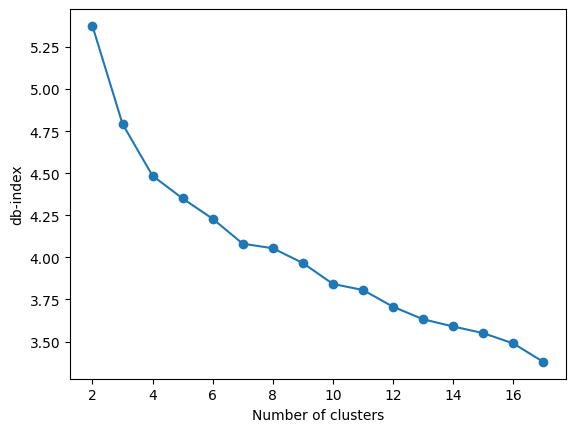

In [28]:
# Using db-index to determine the number of clusters 
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score # db-index is used to determine the number of clusters, the lower the better

db = []
max_clusters = 18
for i in range(2, max_clusters):  
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_norm)
    labels = kmeans.labels_
    db.append(davies_bouldin_score(data_norm, labels))

plt.plot(range(2, max_clusters), db, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('db-index')
plt.show()

# Look for the elbow point or the point of inflection in the DBI plot. This is the point where the decrease in DBI starts to flatten out.
# On the basis of the above plot, we can choose the number of clusters as 3.

C:\Users\Krzychu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


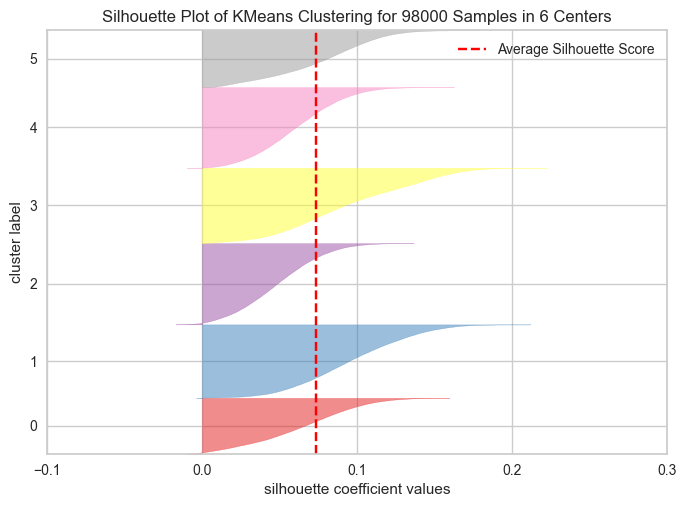

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 98000 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [117]:
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer 
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_norm.values)    
visualizer.show()   

Because of the really long time per one plot for silhouette coefficient plot, we resign from using it. 

In [ ]:
# Using silhouette coefficient to determine the number of clusters (the higher the better)
from sklearn.metrics import silhouette_score

sc = []

max_clusters = 5

for i in range(2, max_clusters):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_norm_min_max)
    labels = kmeans.labels_
    sc.append(silhouette_score(data_norm_min_max, labels))

plt.plot(range(2, max_clusters), sc, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Performing clustering with k-means and DBSCAN. Ending up with 16 different models.

### Model 1: Let's start with 7 clusters KMeans

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319        5  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663        3  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316        0  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001        0  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088        6  

[5 rows x 30 columns]

-1      84403
 0      10608
 2         40
 16        27
 77        23
        ...  
 253        3
 460        3
 222        2
 245        2
 448        2
Name: cluster, Length: 493, dtype: int64


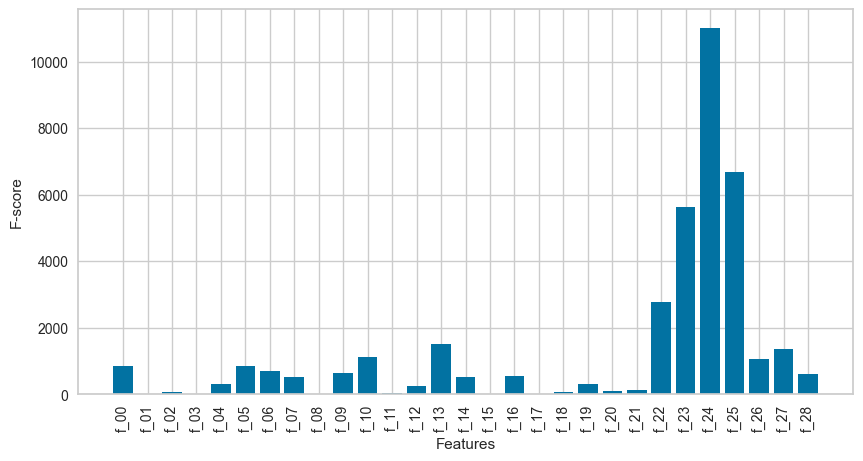

In [203]:
# Model 1: K-means clustering with 7 clusters

# Performing clustering with the optimal number of clusters (5) for db-index on the basis of the min-max normalized data
kmeans = KMeans(n_clusters=7, random_state=0).fit(data_norm)

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head())
print(data_norm3['cluster'].value_counts())

# feature selection using f_regression, the higher the better

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores_regression, p_vals_reg = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores_regression)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-score')
plt.show()

Dropping features not needed to visualization, e.g. for this model useful features seems to be only: 7,9,10,12,13,23,24,25,26,27,28

[11020.817007831592, 6672.850294740186, 5620.103077047873, 2787.8891873256757, 1515.2001145809356, 1358.3217777497116, 1137.4086761558942, 1066.7022941155963, 859.189878309964, 859.0321211581764, 707.9611595485806, 655.7583562501557, 612.604439969352, 546.0484343910522, 531.7007805452178, 525.8070371743588, 327.3521916390399, 303.63176142082284, 256.95632195968363, 144.49525136619812, 94.99389500398046, 83.36541860323133, 73.76874173810216, 31.728633352957242, 18.81512352653664, 7.340310376891988, 5.646505351532429, 5.423517268204219, 0.7419896718042482]


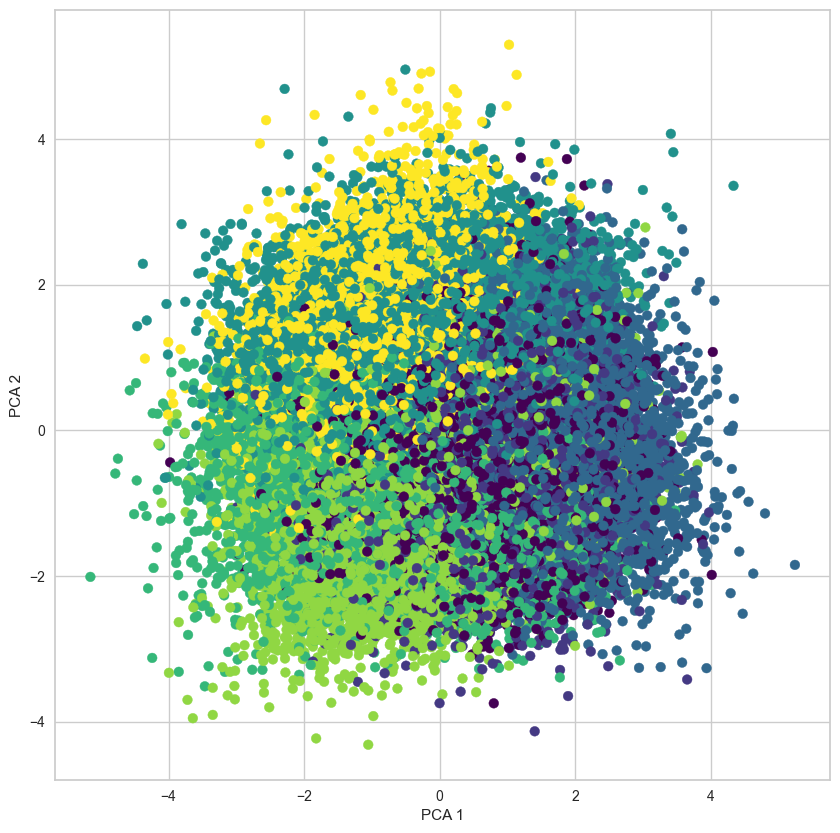

In [204]:
print(sorted(scores_regression, reverse=True))

# dropping the features with low scores, with scores_regression < 500 (arbitrary threshold), 

to_drop = X.columns[scores_regression < 500]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)
# print(X_to_print.shape)

# Visualizing the clusters in 2D using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_to_print)
X_pca = pca.transform(X_to_print)

plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


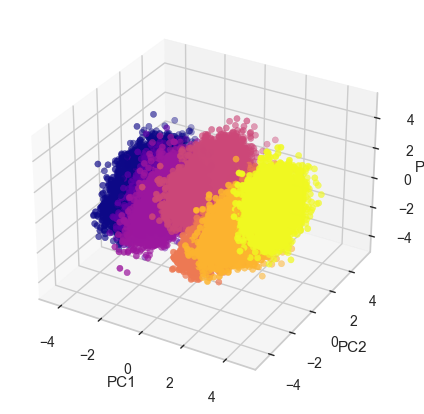

In [205]:
# Visualizing the clusters in the 3D space using PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

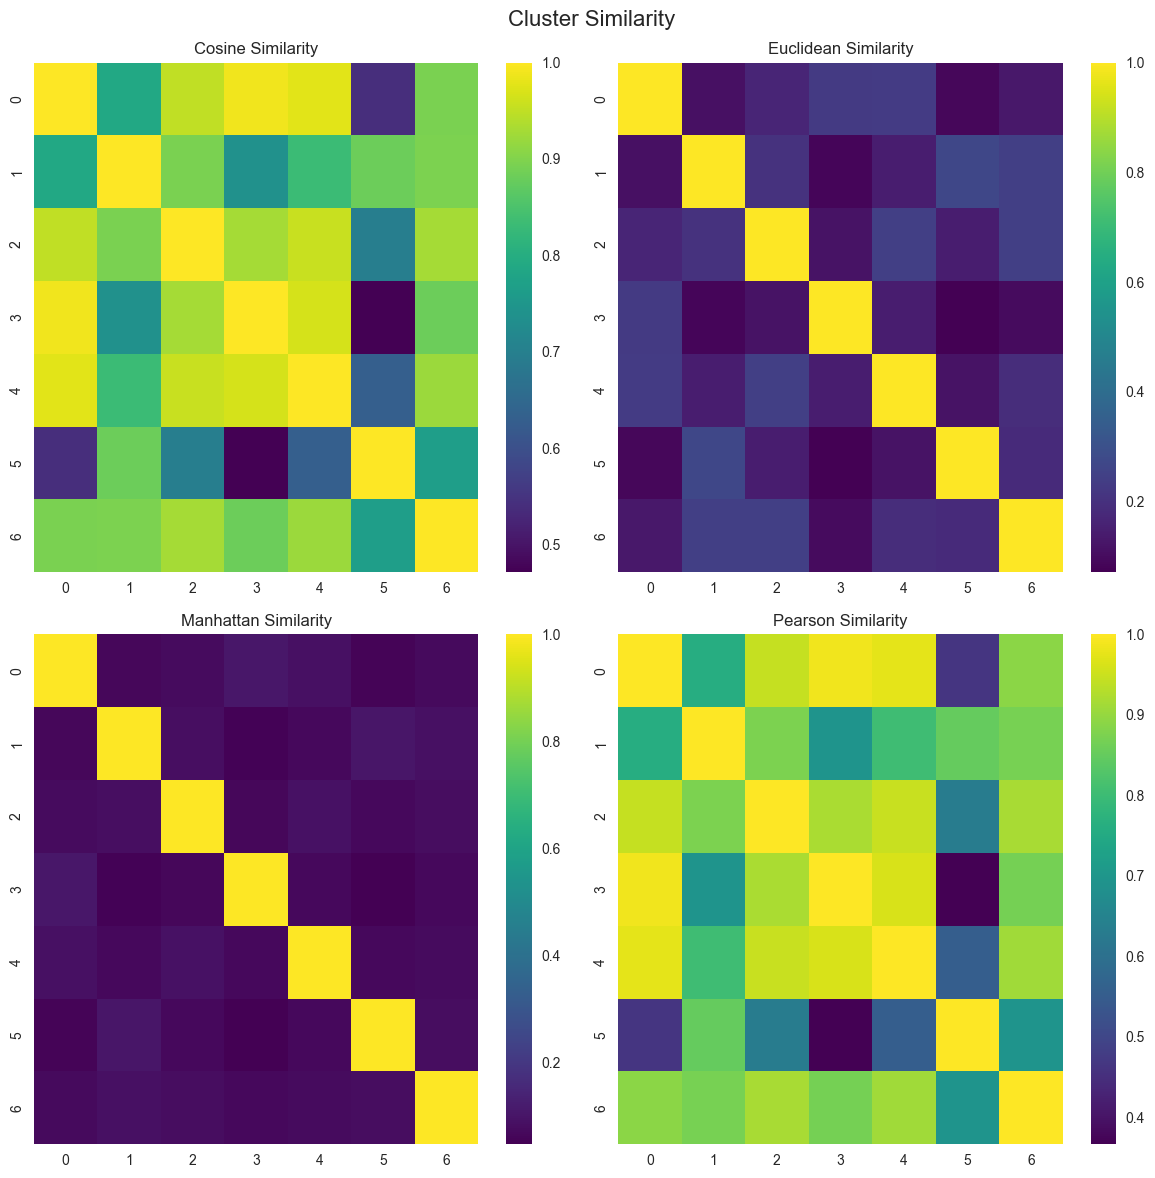

In [206]:
def visualize_cluster_similarity(kmeans):
    # Calculate cluster similarity using different measures
    cluster_centers = kmeans.cluster_centers_

    cosine_sim = cosine_similarity(cluster_centers)
    euclidean_sim = 1 / (1 + euclidean_distances(cluster_centers))
    manhattan_sim = 1 / (1 + manhattan_distances(cluster_centers))

    # Create a DataFrame for each similarity measure
    cosine_df = pd.DataFrame(cosine_sim, index=range(kmeans.n_clusters), columns=range(kmeans.n_clusters))
    euclidean_df = pd.DataFrame(euclidean_sim, index=range(kmeans.n_clusters), columns=range(kmeans.n_clusters))
    manhattan_df = pd.DataFrame(manhattan_sim, index=range(kmeans.n_clusters), columns=range(kmeans.n_clusters))

    # Calculate cluster similarity using Pearson correlation coefficient
    pearson_sim = np.zeros((kmeans.n_clusters, kmeans.n_clusters))
    for i in range(kmeans.n_clusters):
        for j in range(kmeans.n_clusters):
            pearson_sim[i, j], _ = pearsonr(cluster_centers[i], cluster_centers[j])

    # Create a DataFrame for Pearson similarity
    pearson_df = pd.DataFrame(pearson_sim, index=range(kmeans.n_clusters), columns=range(kmeans.n_clusters))


    # Create subplots for each similarity measure
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('Cluster Similarity', fontsize=16)

    # Cosine similarity
    sns.heatmap(cosine_df, annot=False, cmap='viridis', ax=axs[0, 0])
    axs[0, 0].set_title('Cosine Similarity')

    # Euclidean similarity
    sns.heatmap(euclidean_df, annot=False, cmap='viridis', ax=axs[0, 1])
    axs[0, 1].set_title('Euclidean Similarity')

    # Manhattan similarity
    sns.heatmap(manhattan_df, annot=False, cmap='viridis', ax=axs[1, 0])
    axs[1, 0].set_title('Manhattan Similarity')

    # Pearson similarity
    sns.heatmap(pearson_df, annot=False, cmap='viridis', ax=axs[1, 1])
    axs[1, 1].set_title('Pearson Similarity')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()





visualize_cluster_similarity(kmeans)




### Model 2: What about 10 clusters KMeans

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319        9  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663        7  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316        0  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001        4  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088        2  

[5 rows x 30 columns]

-1      84403
 0      10608
 2         40
 16        27
 77        23
        ...  
 253        3
 460        3
 222        2
 245        2
 448        2
Name: cluster, Length: 493, dtype: int64


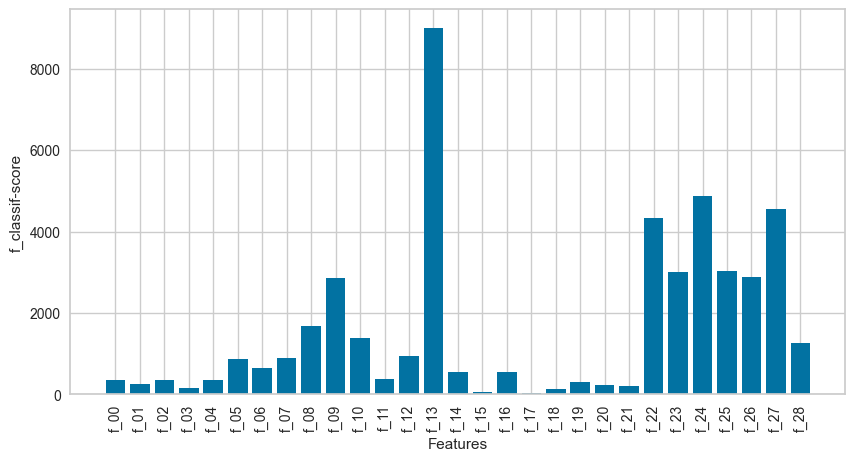

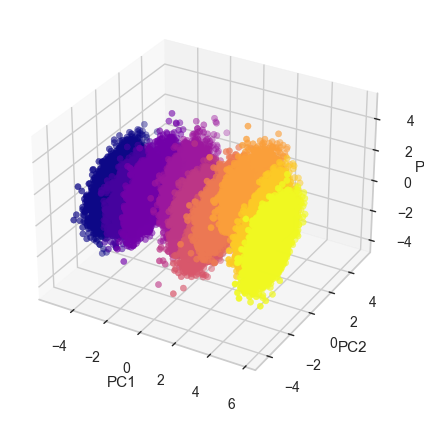

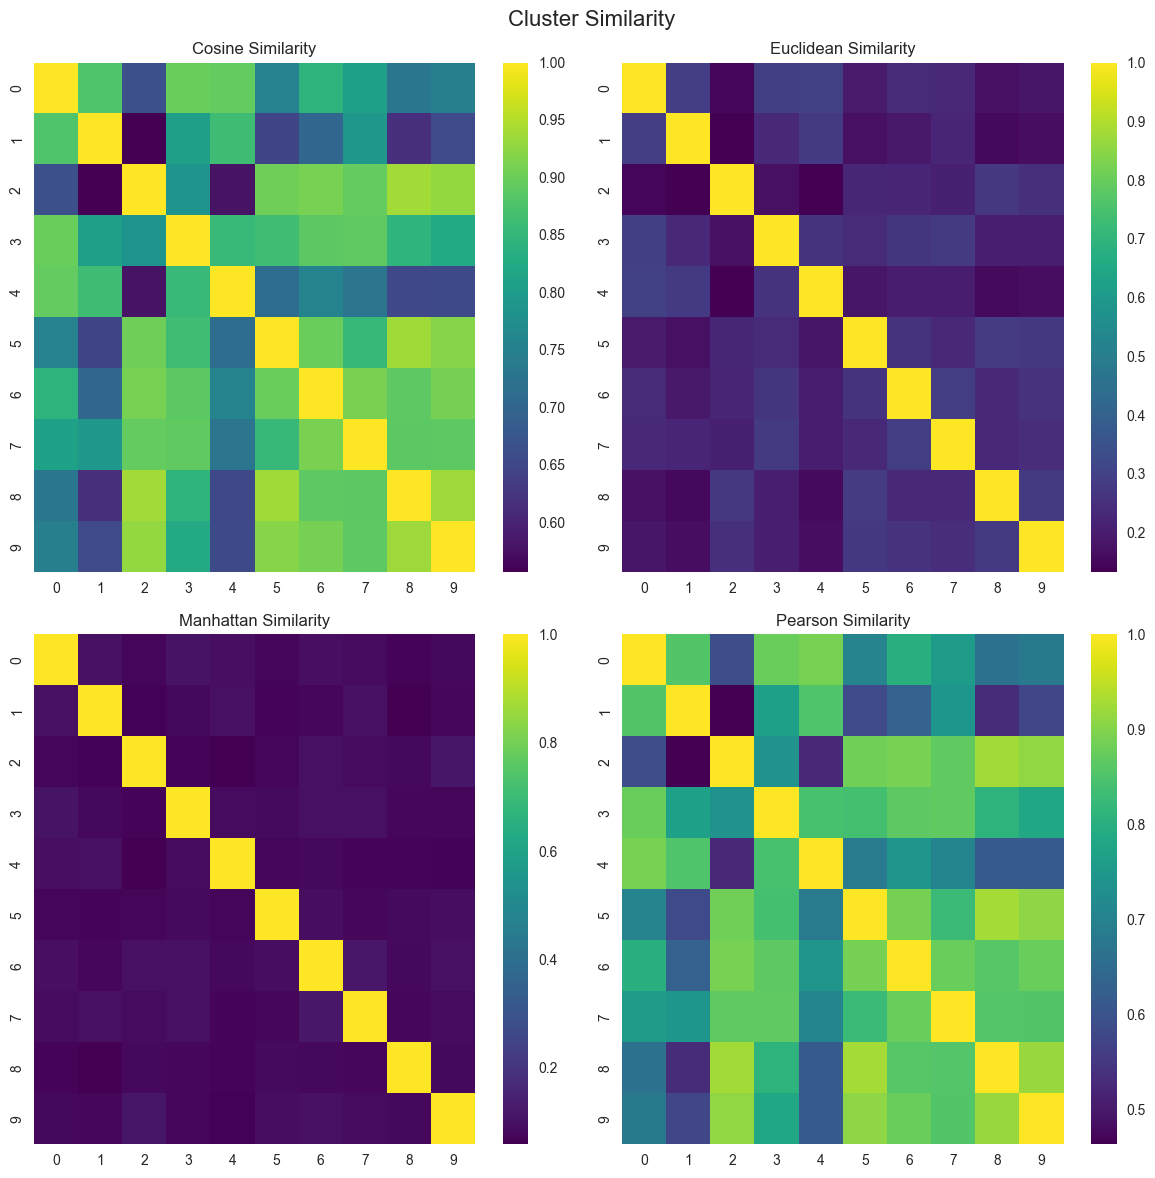

In [207]:
# Model 2: K-means clustering with 4 clusters

# Performing clustering with the number of clusters (4)
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_norm)

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head())
print(data_norm3['cluster'].value_counts())

# feature selection using f_classif, the higher the better

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores, p_vals_reg = f_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_classif-score')
plt.show()

to_drop = X.columns[scores < 500]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

### Model 3: 

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319       12  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663        7  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316        4  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001       14  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088        2  

[5 rows x 30 columns]

-1      84403
 0      10608
 2         40
 16        27
 77        23
        ...  
 253        3
 460        3
 222        2
 245        2
 448        2
Name: cluster, Length: 493, dtype: int64


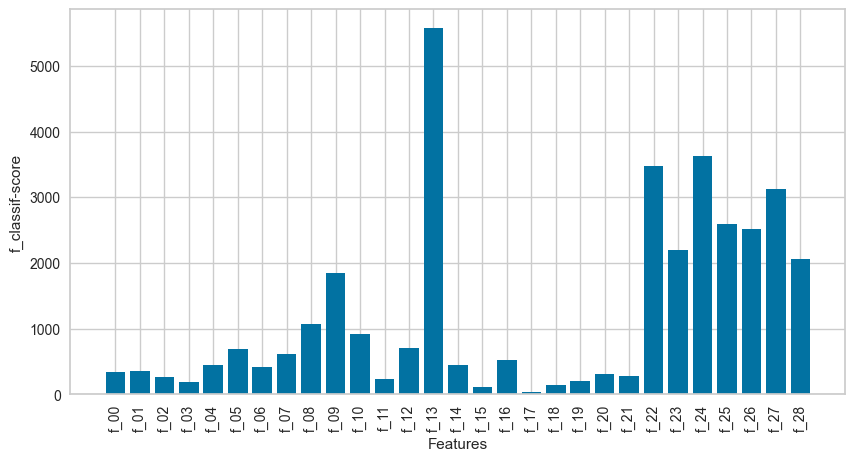

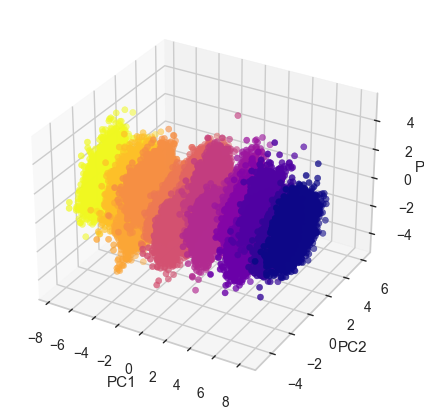

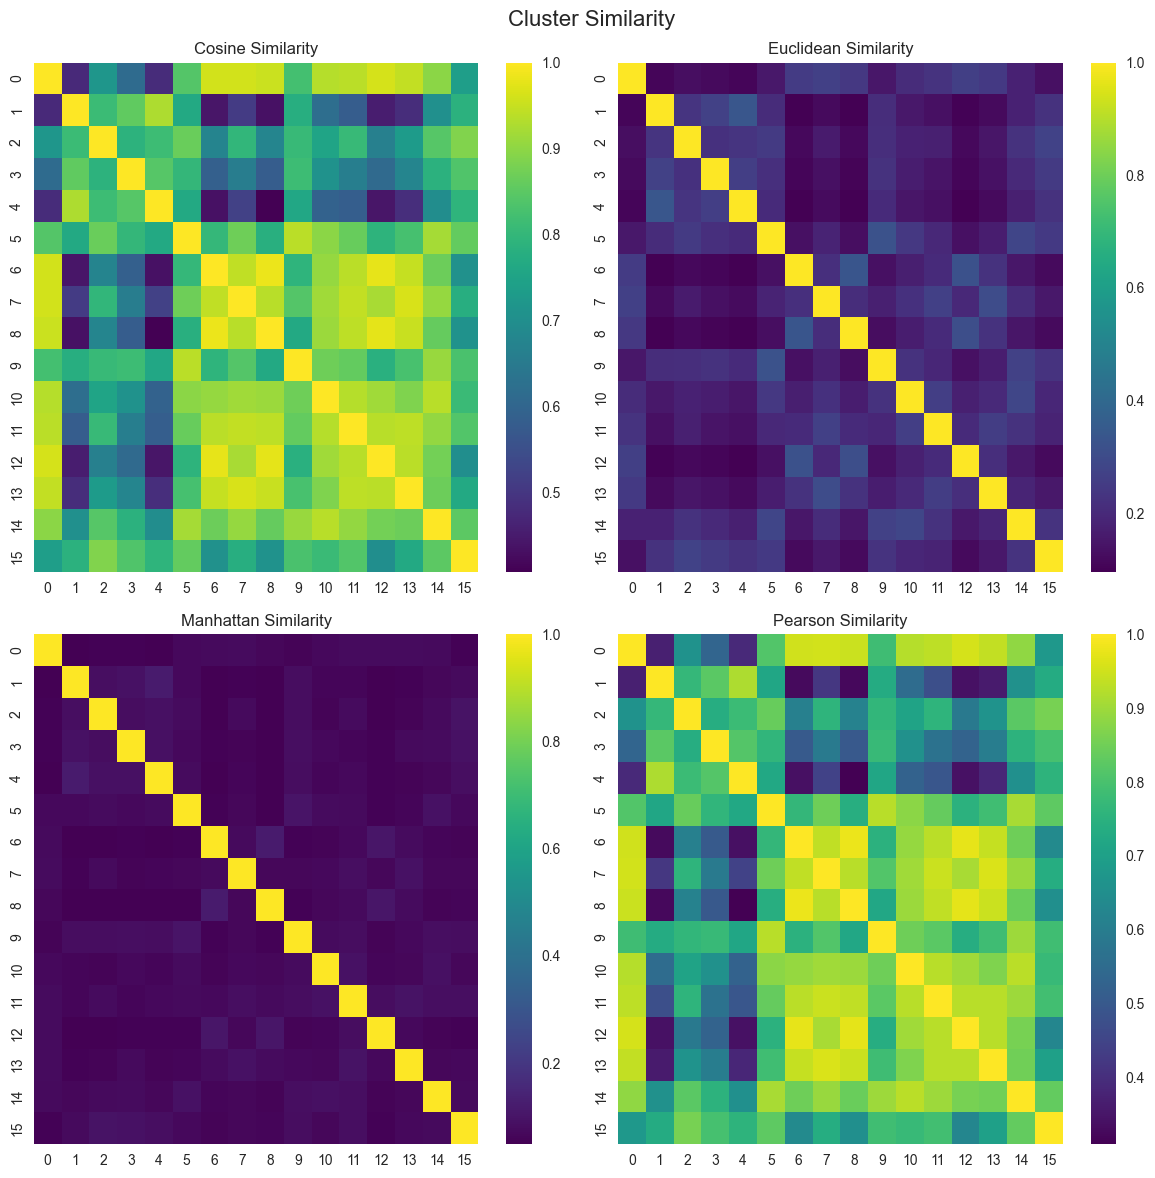

In [209]:
# Model 3: K-means clustering with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=0).fit(data_norm)

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head())
print(data_norm3['cluster'].value_counts())

# feature selection using chi2, the higher the better

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores, p_vals_reg = f_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_classif-score')
plt.show()

to_drop = X.columns[scores < 500]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

Where is it useful to increase max_iterations done by kmeans algorithm?
- Complex datasets may require more iterations for convergence.
- Sparse data: K-means may converge more slowly on datasets with a large number of sparse features.
- In high-dimensional spaces, the distance between points can become less informative, which can impact the convergence of K-means.

### Model 4:

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 16, 'n_init': 'warn', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}


f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319        5  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663       11  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316        3  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001        6  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088        9  

[5 rows x 30 columns]

-1      84403
 0      10608
 2         40
 16        27
 77        23
        ...  
 253        3
 460        3
 222        2
 245        2
 448        2
Name: cluster, Length: 493, dtype: int64


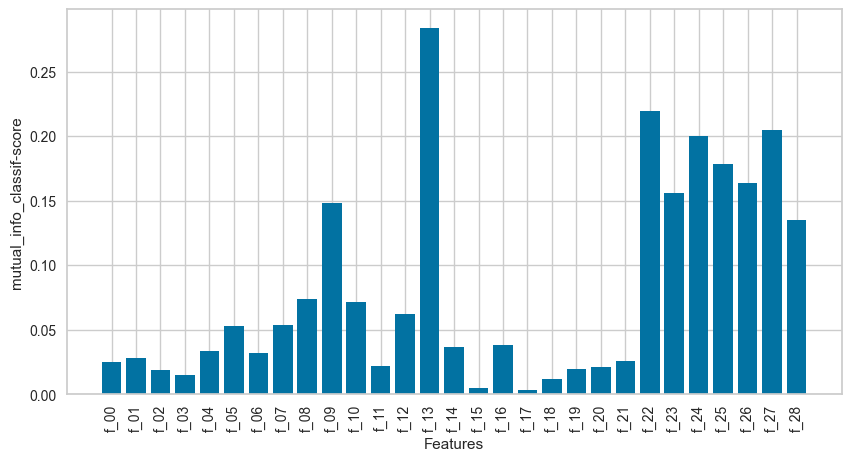

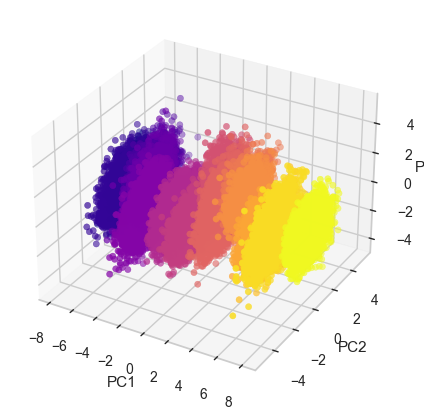

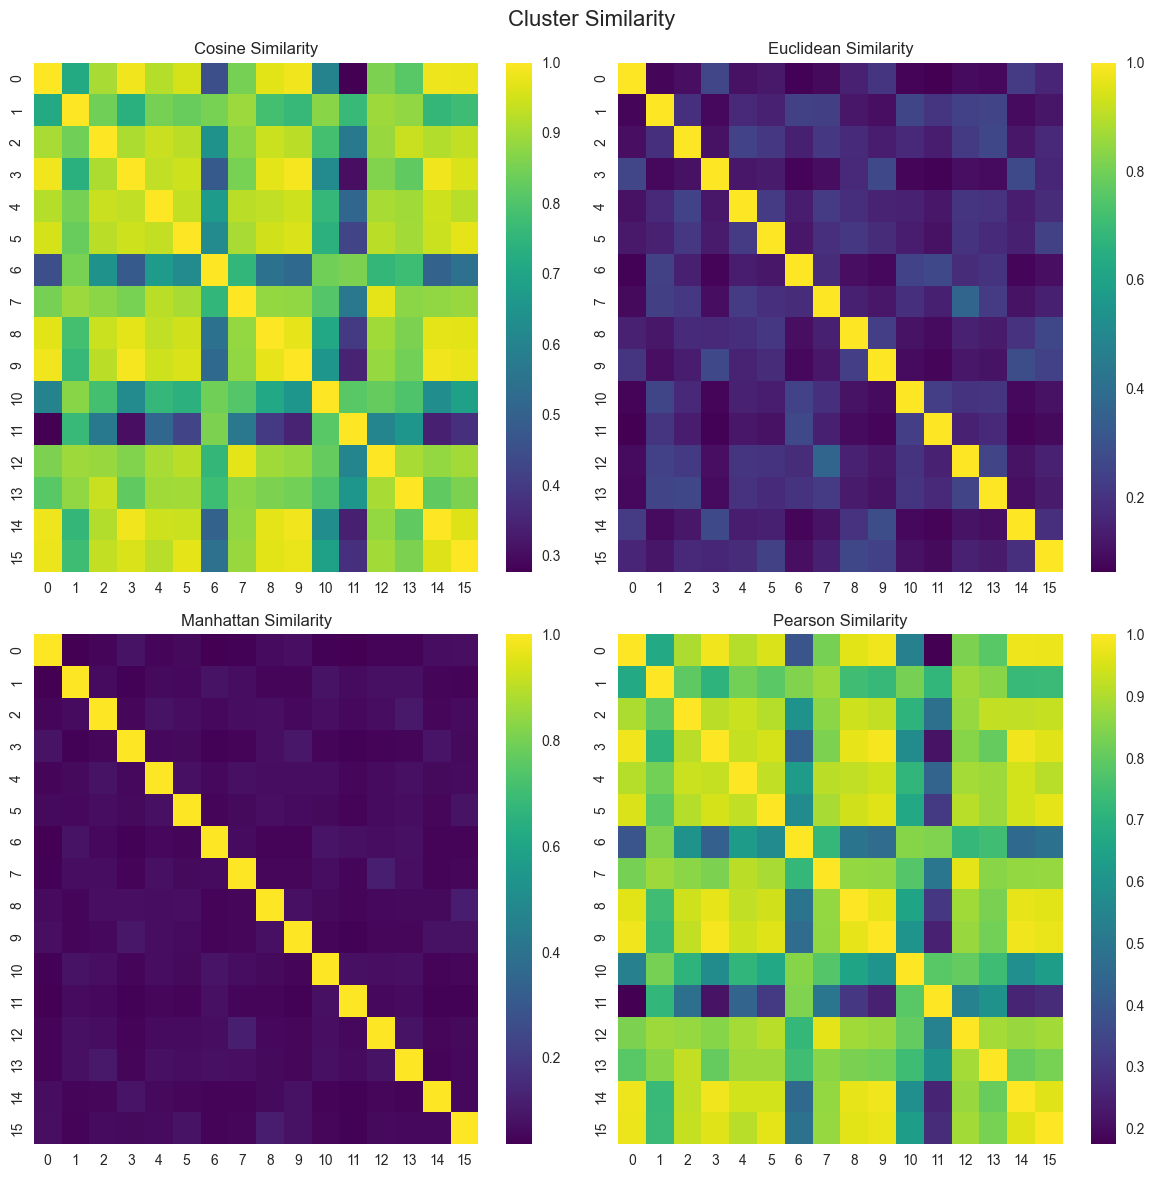

In [211]:
# Model 4: K-means clustering with 16 clusters, but with max_iter=1000 to make sure that the algorithm converges
kmeans = KMeans(n_clusters=16, random_state=0, max_iter = 1000).fit(data_norm)
# max_iter = 1000 -> 1000 iterations
# listing kmeans parameters
print(kmeans.get_params())

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head()) 
print(data_norm3['cluster'].value_counts())

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores = mutual_info_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('mutual_info_classif-score')
plt.show()

to_drop = X.columns[scores < 0.05]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

Is it sometimes useful to set max_iter lower value? (in context of Kmeans)
- computational efficiency - just to make computations possible
- doesn't wasting computer power 

So it doesn't seem to be useful to even try it. 

What about used "algorithm"? Deafault it's lloyd, but alternative it's elkan. 

The "elkan" variation can be more efficient on some datasets with well-defined clusters(The clusters are compact and well-separated, making it easier for the algorithm to identify and assign data points to their respective clusters), by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

I think, we can try to check the results for quite good separated groups with 3 clusters. 

### Model 5:

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319        1  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663       13  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316        6  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001        0  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088       13  

[5 rows x 30 columns]

-1      84403
 0      10608
 2         40
 16        27
 77        23
        ...  
 253        3
 460        3
 222        2
 245        2
 448        2
Name: cluster, Length: 493, dtype: int64


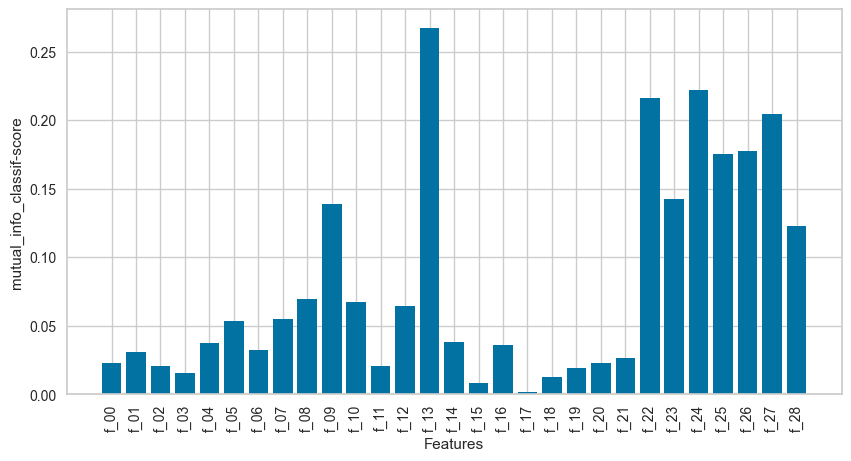

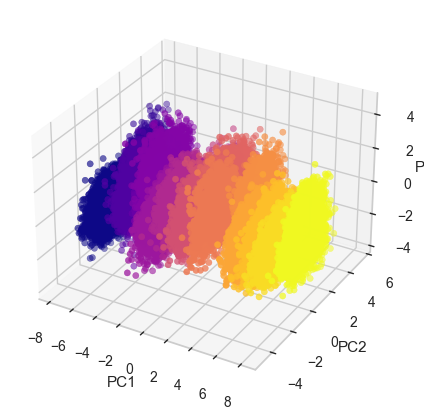

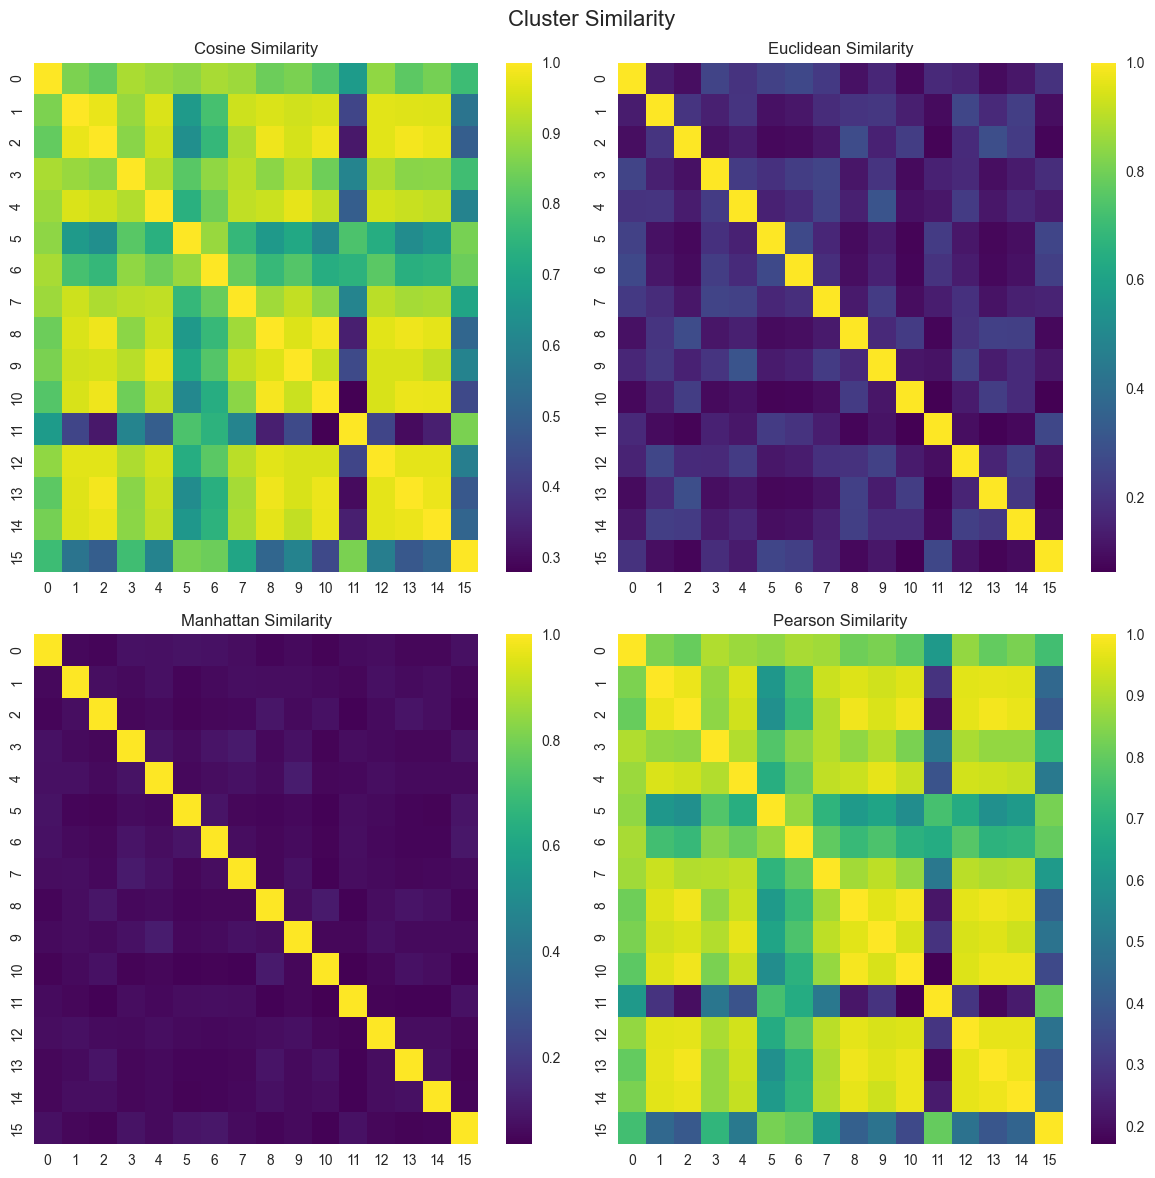

In [213]:
# Model 5: K-means clustering with 16 clusters and algorithm='elkan'
# 
# Elkan's algorithm is an improvement on the standard k-means algorithm that can accelerate convergence by using the triangle inequality, and thus avoiding many unnecessary distance calculations.

kmeans = KMeans(n_clusters=16, random_state=0, algorithm='elkan').fit(data_norm)

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head())
print(data_norm3['cluster'].value_counts())

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores = mutual_info_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('mutual_info_classif-score')
plt.show()

to_drop = X.columns[scores < 0.05]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

"tol" parameter 

A smaller tol value will make the algorithm converge to a higher level of precision but may require more iterations. 
On the other hand, a larger tol value may allow the algorithm to converge faster but with potentially lower precision.

### Model 6:

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319        3  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663        2  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316        1  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001        0  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088        2  

[5 rows x 30 columns]

-1      84403
 0      10608
 2         40
 16        27
 77        23
        ...  
 253        3
 460        3
 222        2
 245        2
 448        2
Name: cluster, Length: 493, dtype: int64


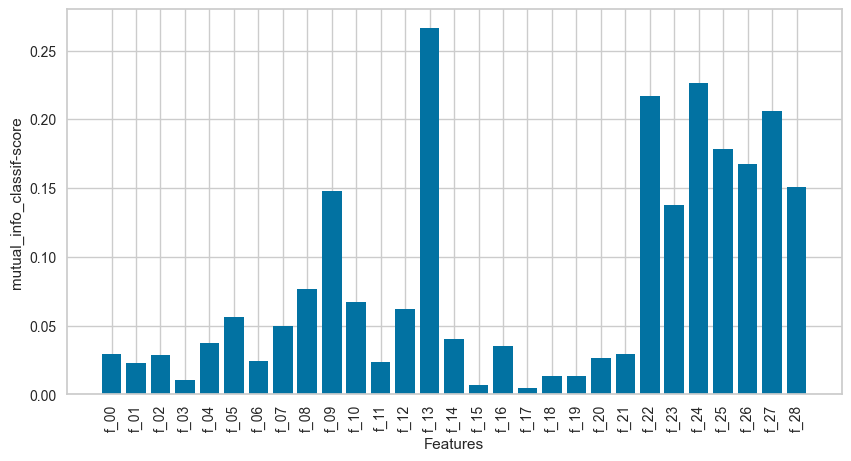

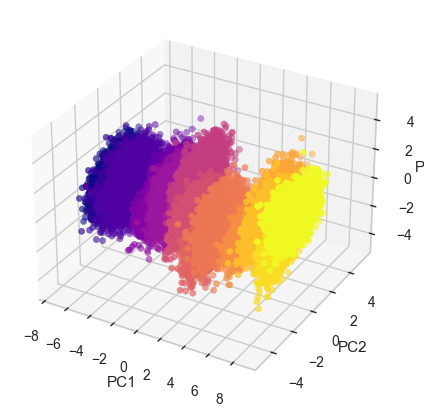

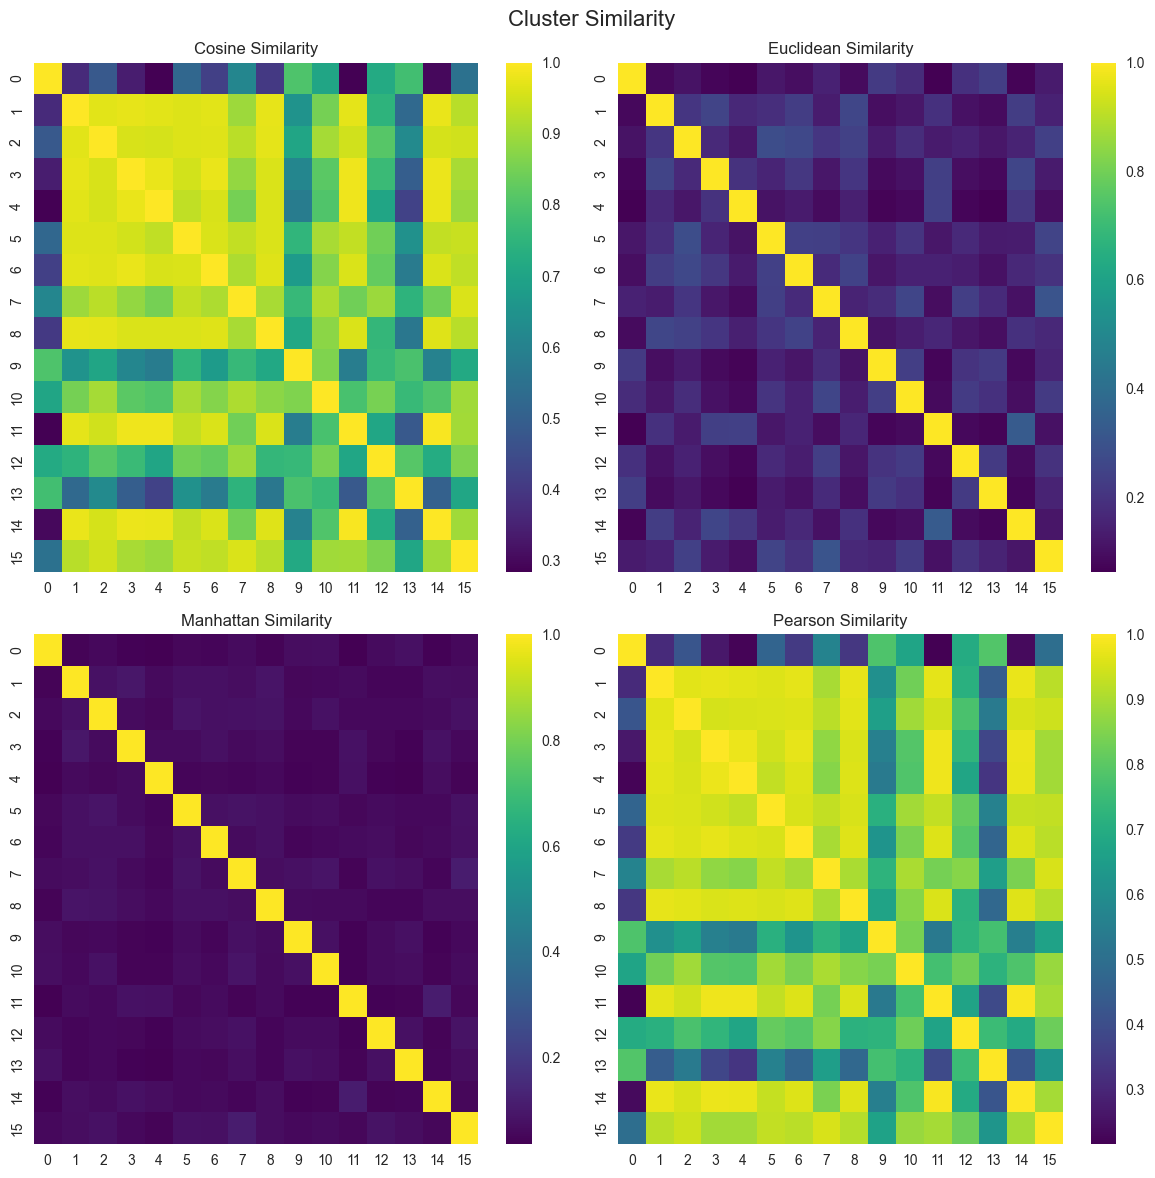

In [215]:
# Model 6: K-means clustering with 3 clusters and tol=0.00001, just to see how does it affect the results
kmeans = KMeans(n_clusters=16, random_state=0, tol=0.00001).fit(data_norm)

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head())
print(data_norm3['cluster'].value_counts())

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores = mutual_info_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('mutual_info_classif-score')
plt.show()

to_drop = X.columns[scores < 0.05]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

### Determing for which parameters of DBSCAN, we would get any clusters

In [83]:
def find_clusters_dbscan(data, eps_range, min_samples_range):
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            
            unique_labels = set(dbscan.labels_)
            n_clusters = len(unique_labels) - 1  # Exclude noise points (-1 label)
            
            if n_clusters > 0:
                print(f"DBSCAN clusters found with eps={eps} and min_samples={min_samples}:")
                print(f"Number of clusters: {n_clusters}")
                print(f"Cluster labels: {unique_labels}")
                return dbscan
    
    print("No clusters found for the given parameter ranges.")
    return None

# Example usage
eps_range = [0.1, 0.5, 1.0]
min_samples_range = [3, 5, 10]
dbscan_model = find_clusters_dbscan(data_norm, eps_range, min_samples_range)


No clusters found for the given parameter ranges.


We didn't get any, so we decided to use differently preprocessed data and apply:
- OneHotEncoder - to categorical variables

In [150]:
data_norm2 = data.copy()

from sklearn.preprocessing import OneHotEncoder

for feature in data.columns[0:7]:
    data_norm2[feature] = (data[feature] - data[feature].mean()) / data[feature].std()

for feature in data.columns[13:40]:
    data_norm2[feature] = (data[feature] - data[feature].mean()) / data[feature].std()


# Assuming `data` is your dataframe with categorical variables
# Select only the categorical columns
categorical_cols = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
data_categorical = data[categorical_cols]

# One-hot encode the data (ignore the warning)
preprocessor = OneHotEncoder(sparse=False)
data_one_hot_encoded = preprocessor.fit_transform(data_categorical)

# Convert the sparse array to a dataframe
data_one_hot_encoded = pd.DataFrame(
    data_one_hot_encoded
)

data_one_hot_encoded.columns = data_one_hot_encoded.columns.astype(str)

# Drop the original categorical columns (will replace with one-hot encoding)
data_norm2 = data_norm2.drop(categorical_cols, axis=1)

# Add the one-hot encoded categorical columns to our dataframe
data_norm2 = pd.concat(
    [data_norm2, data_one_hot_encoded],
    axis=1
)

data_norm2.head()

# display(data_norm2.head())

# check in which columns there are NaN values
data_norm2.isnull().sum()

# drop 'cluseter' column
data_norm2 = data_norm2.drop(['cluster'], axis=1)


f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0 -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1 -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2  0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3 -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4 -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

       f_14      f_15      f_16  ...  231  232  233  234  235  236  237  238  \
0 -0.473735  0.360370  1.059230  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.588245 -0.393844  0.139971  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.684013  0.471448  0.343314  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.393286  0.628712 -1.076419  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -0.124288 -0.612268 -1.066268  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   239  240  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 264 columns]

In [154]:
# Example usage
eps_range = [0.1, 0.5, 1.0]
min_samples_range = [3, 5, 10]
dbscan_model = find_clusters_dbscan(data_norm2, eps_range, min_samples_range)

No clusters found for the given parameter ranges.


In [164]:
data_norm3 = data_norm.drop(['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13'], axis=1) # drop categorical columns also did not help

f_22      f_23      f_24      f_25      f_26      f_27      f_28
id                                                                      
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088

So, we decided to take quite strong moves, deleting all features till the most important 22-28, when finally we get some clusters. Impressing 733 clusters 

In [173]:
# dropping all columns with index lower than 22
data_norm3 = data_norm.drop(data_norm.columns[0:22], axis=1)
# droping also cluseter column
data_norm3 = data_norm3.drop(['cluster'], axis=1)
# data_norm3 = data_norm.drop(['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'cluster'], axis=1)
data_norm3.head()

f_22      f_23      f_24      f_25      f_26      f_27      f_28
id                                                                      
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088

I have tried to add again categorical variables, that seemed to also have some impact on clusters, but again, I didn't get any clusters. 

In [166]:
categorical_cols = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
data_categorical = data[categorical_cols]

# One-hot encode the data (ignore the warning)
preprocessor = OneHotEncoder(sparse=False)
data_one_hot_encoded = preprocessor.fit_transform(data_categorical)

# Convert the sparse array to a dataframe
data_one_hot_encoded = pd.DataFrame(
    data_one_hot_encoded
)

data_one_hot_encoded.columns = data_one_hot_encoded.columns.astype(str)

# Add the one-hot encoded categorical columns to our dataframe
data_norm4 = pd.concat(
    [data_norm3, data_one_hot_encoded],
    axis=1
)

data_norm4.head()

f_22      f_23      f_24      f_25      f_26      f_27      f_28    0  \
0 -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319  0.0   
1 -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663  0.0   
2  2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316  0.0   
3  0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001  0.0   
4  0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088  0.0   

     1    2  ...  231  232  233  234  235  236  237  238  239  240  
0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 248 columns]

### Model 7: Trying DBSCAN models

Number of clusters: 2432
-1       66961
 0       20444
 215        46
 236        35
 154        30
         ...  
 890         3
 781         3
 2168        3
 1713        3
 2368        3
Name: cluster, Length: 2433, dtype: int64


f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         0  
1        -1  
2        -1  
3         1  
4        -1

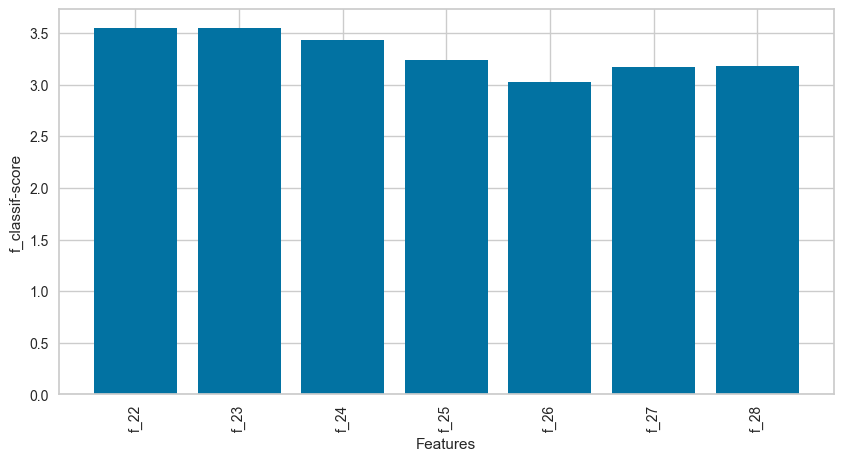

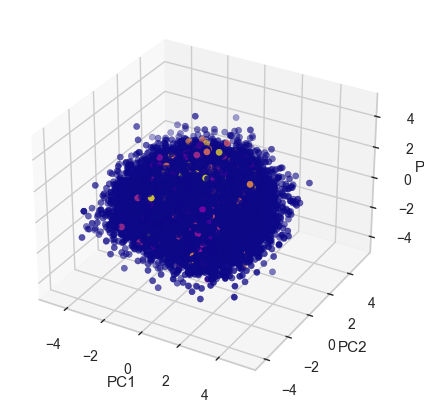

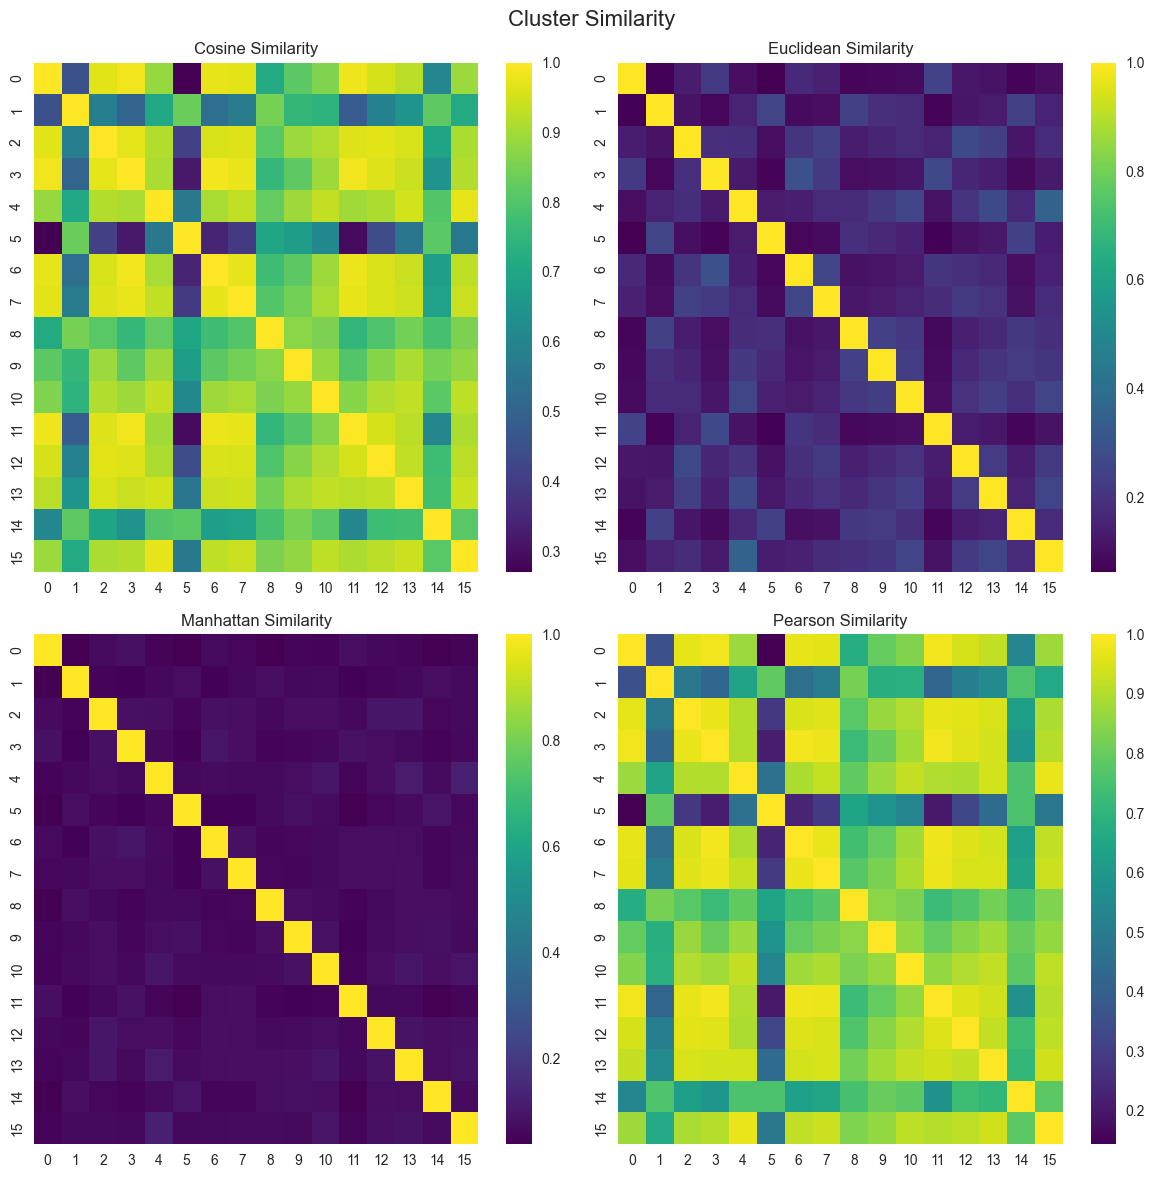

In [185]:
# Model 7: DBSCAN clustering with default parameters on only 22-28 features

dbscan = DBSCAN(eps=0.5, min_samples=3).fit(data_norm3)

labels = dbscan.labels_

# Count the number of clusters (excluding noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters:", n_clusters)

data_norm3['cluster'] = labels

print(data_norm3['cluster'].value_counts())

display(data_norm3.head())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_classif-score')
plt.show()

to_drop = X.columns[scores < 3.1]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

# Visualizing the clusters in 3D!

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

Unfortunatly, the number of noisy points is not satisfying, it's too much if most of the points are not assigned. 

Now, we decided to consider different parameters of DBSCAN, let's start with eps

The maximum distance between two samples for one to be considered as in the neighborhood of the other. 

A smaller value of eps creates tighter and more compact clusters. It requires points to be closer to each other to be considered neighbors, resulting in denser clusters.
A larger value of eps allows for a broader range of distances, leading to larger clusters that can capture more spread-out data points.

### Model 8:

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0        -1  
1        -1  
2        -1  
3        -1  
4        -1

-1    98000
Name: cluster, dtype: int64


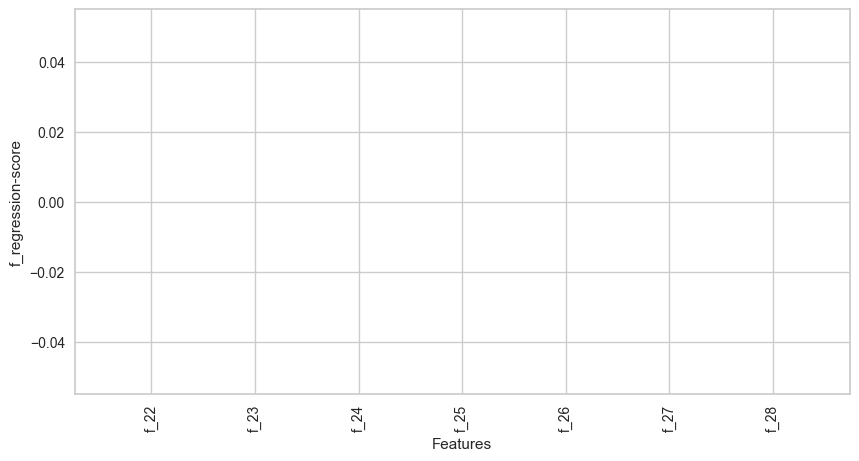

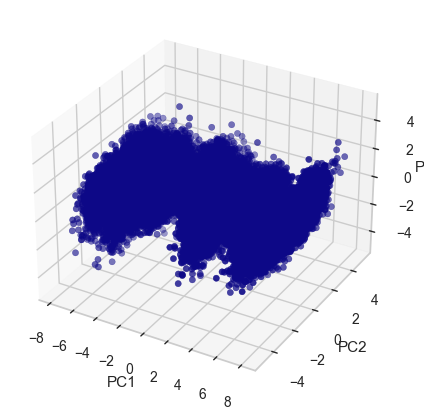

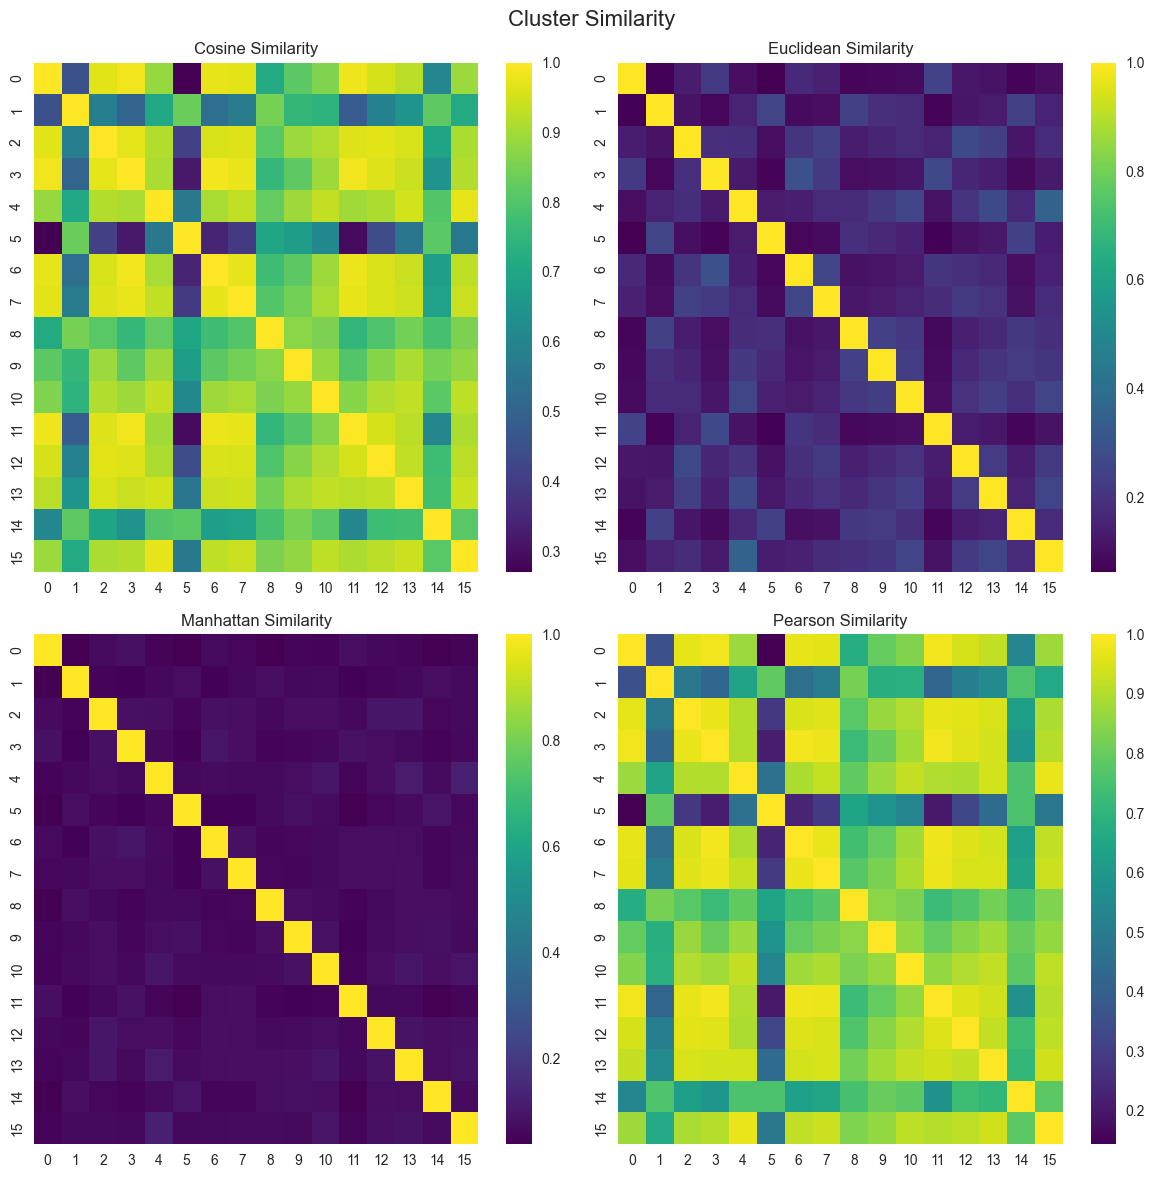

In [186]:
# Model 8: DBSCAN clustering with eps=0.1 and min_samples=5
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(data_norm3)

labels = dbscan.labels_
data_norm3['cluster'] = labels
display(data_norm3.head()) 

print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_regression-score')
plt.show()

to_drop = X.columns[scores < 0.01]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)


The change shoudn't go in this direction.   

### Model 9:

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         0  
1         0  
2         0  
3         0  
4         0

 0     88815
-1      9087
 4         9
 6         7
 11        7
 2         7
 8         7
 1         6
 16        5
 17        5
 7         5
 13        5
 9         5
 12        5
 5         5
 3         5
 15        5
 10        5
 14        5
Name: cluster, dtype: int64


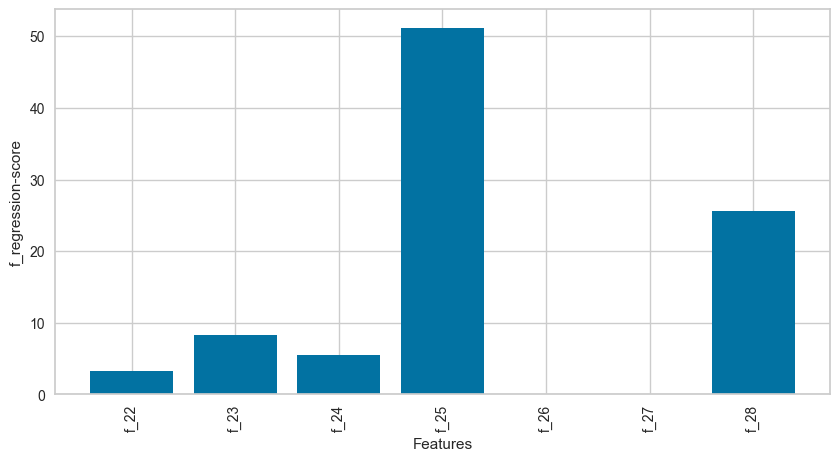

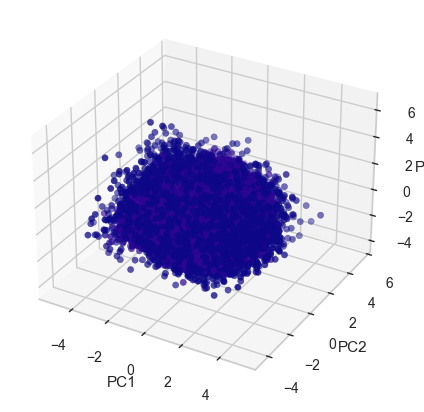

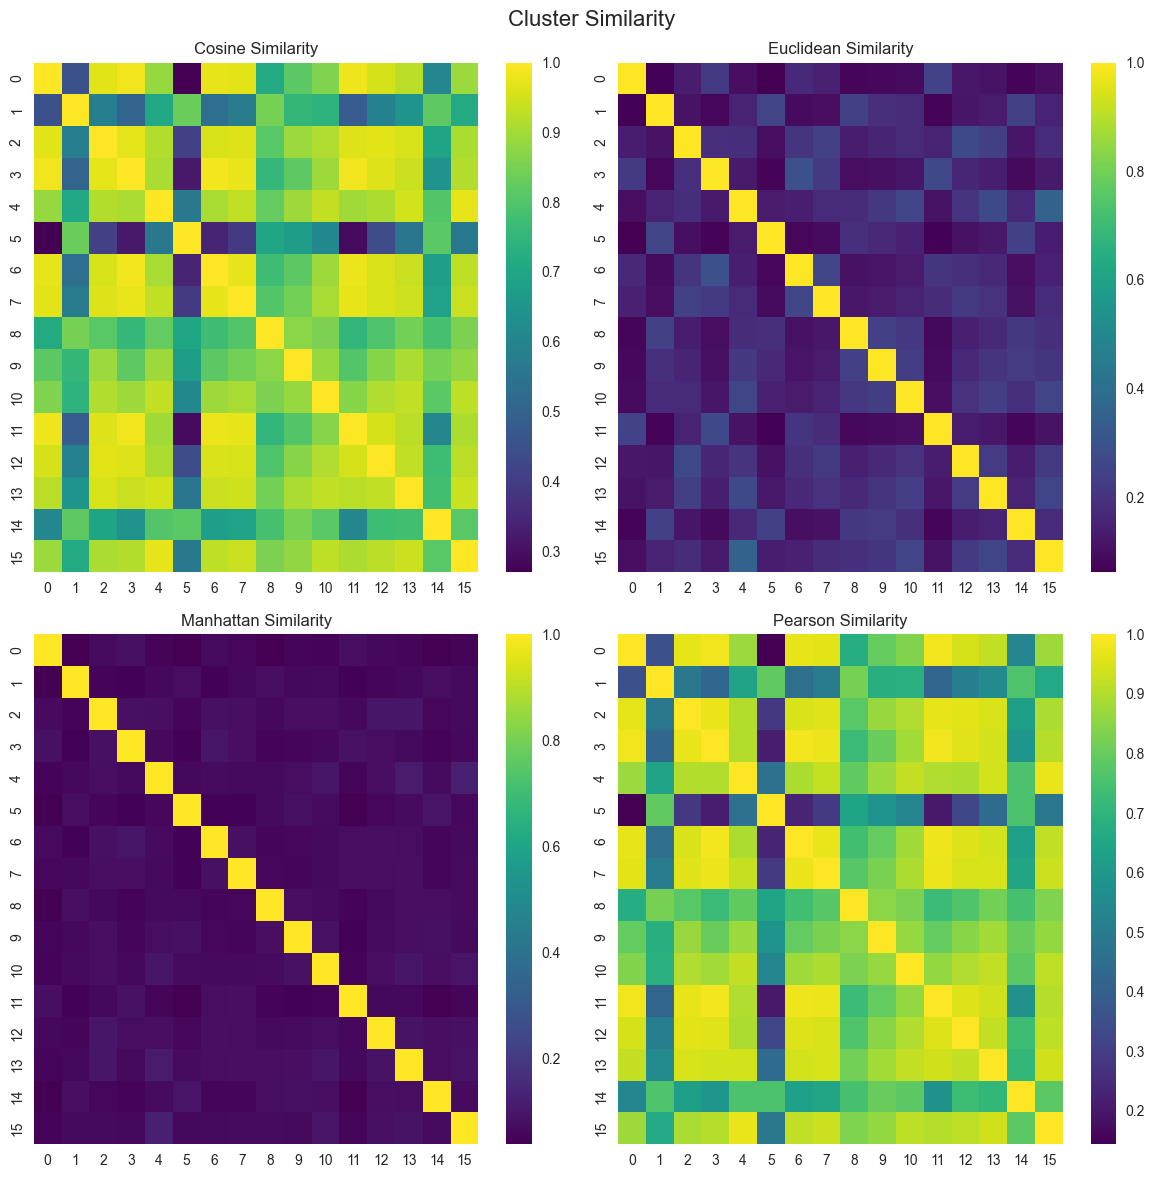

In [189]:
# Model 9: DBSCAN clustering with eps=0.9 and min_samples=5
dbscan = DBSCAN(eps=0.9, min_samples=5).fit(data_norm3)

labels = dbscan.labels_
data_norm3['cluster'] = labels
display(data_norm3.head())

print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_regression-score')
plt.show()

to_drop = X.columns[scores < 5]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

It's better, it's good that we almost don't have noisy points, but we have almost all points in the same cluster. So we tried to adjust parameters, lowering eps and min_samples. To not get all examples in the same class. Learning about affecting of min_samples our results:

Another parameter of DBSCAN is min_samples -> it specifies the min number of points required within epsilon neighbourhood to for a core point, which is the foundation for identifying clusters. 

A smaller value of min_samples allows for more points to be considered as core points. This can result in more clusters being formed, including smaller and potentially noisy clusters.
A larger value of min_samples requires a higher density of points within the neighborhood to form a core point. This can lead to fewer clusters and only larger, more significant clusters being identified.

### Model 10:

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         0  
1         0  
2        -1  
3         0  
4         0

 0      69805
-1      26751
 60        16
 43        14
 47        12
        ...  
 220        2
 42         2
 285        2
 257        1
 308        1
Name: cluster, Length: 341, dtype: int64


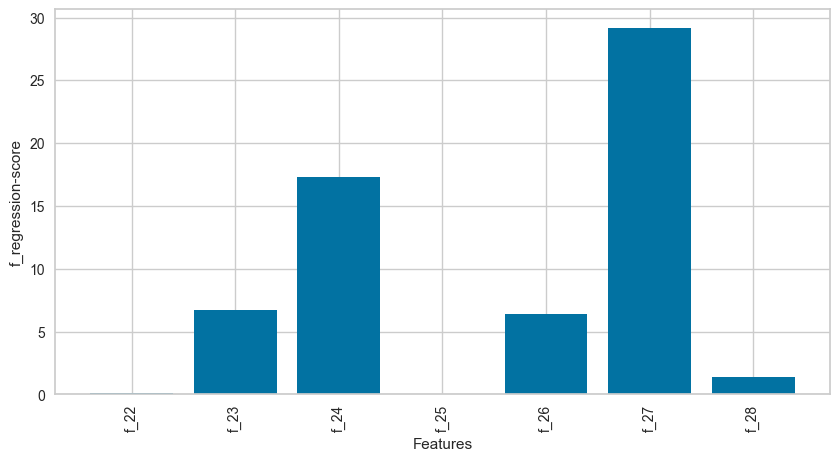

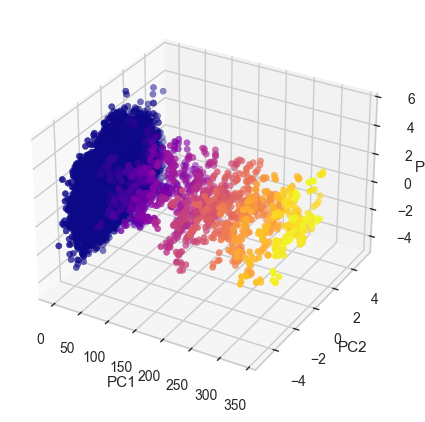

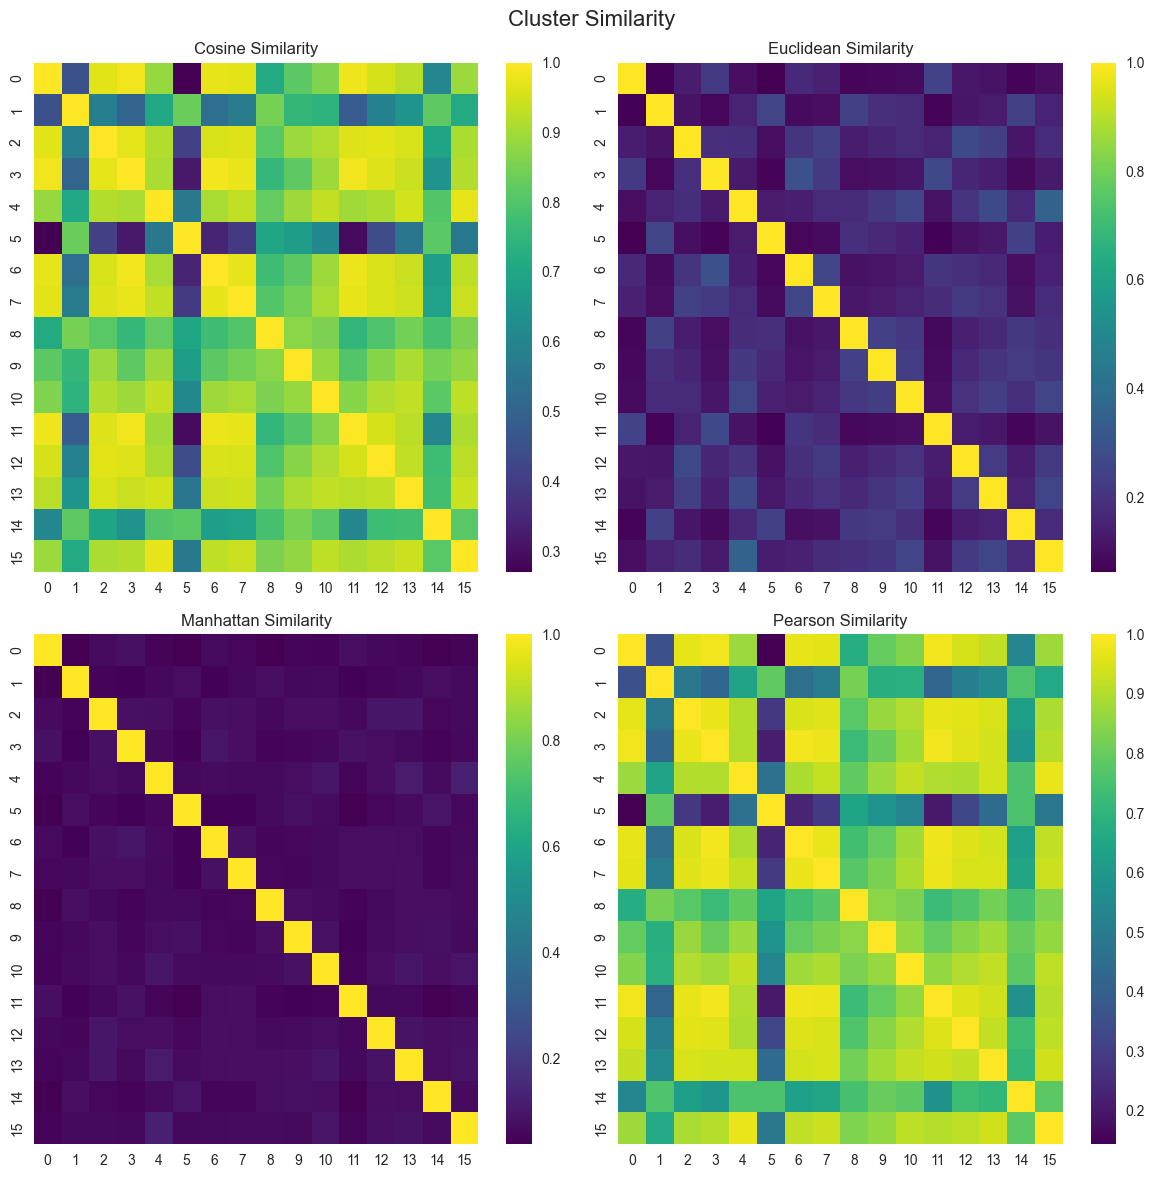

In [190]:
# Model 10: DBSCAN clustering with eps=0.7 and min_samples=4
dbscan = DBSCAN(eps=0.7, min_samples=4).fit(data_norm3)

labels = dbscan.labels_
data_norm3['cluster'] = labels
display(data_norm3.head())

print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_regression-score')
plt.show()

to_drop = X.columns[scores < 5]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

Results of the PCA visualizations, were finally more satisfying, but we still wanted more.  

For example more uniform distribution of instances over different clusters. 

### Model 11

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         0  
1         0  
2        -1  
3         0  
4         0

 0     53242
-1     44570
 9        11
 24       11
 18       10
 12       10
 23       10
 2         9
 8         9
 22        9
 17        8
 10        8
 25        8
 6         7
 20        7
 5         7
 13        6
 1         6
 11        6
 14        6
 15        6
 16        6
 4         6
 19        6
 7         6
 21        5
 3         5
Name: cluster, dtype: int64


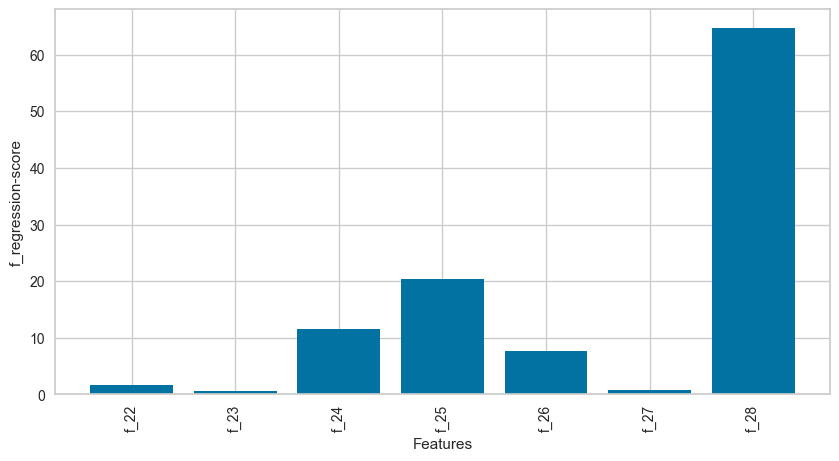

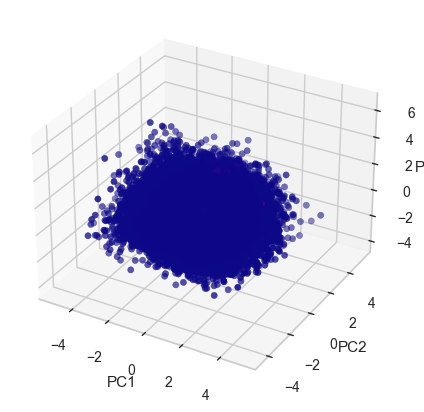

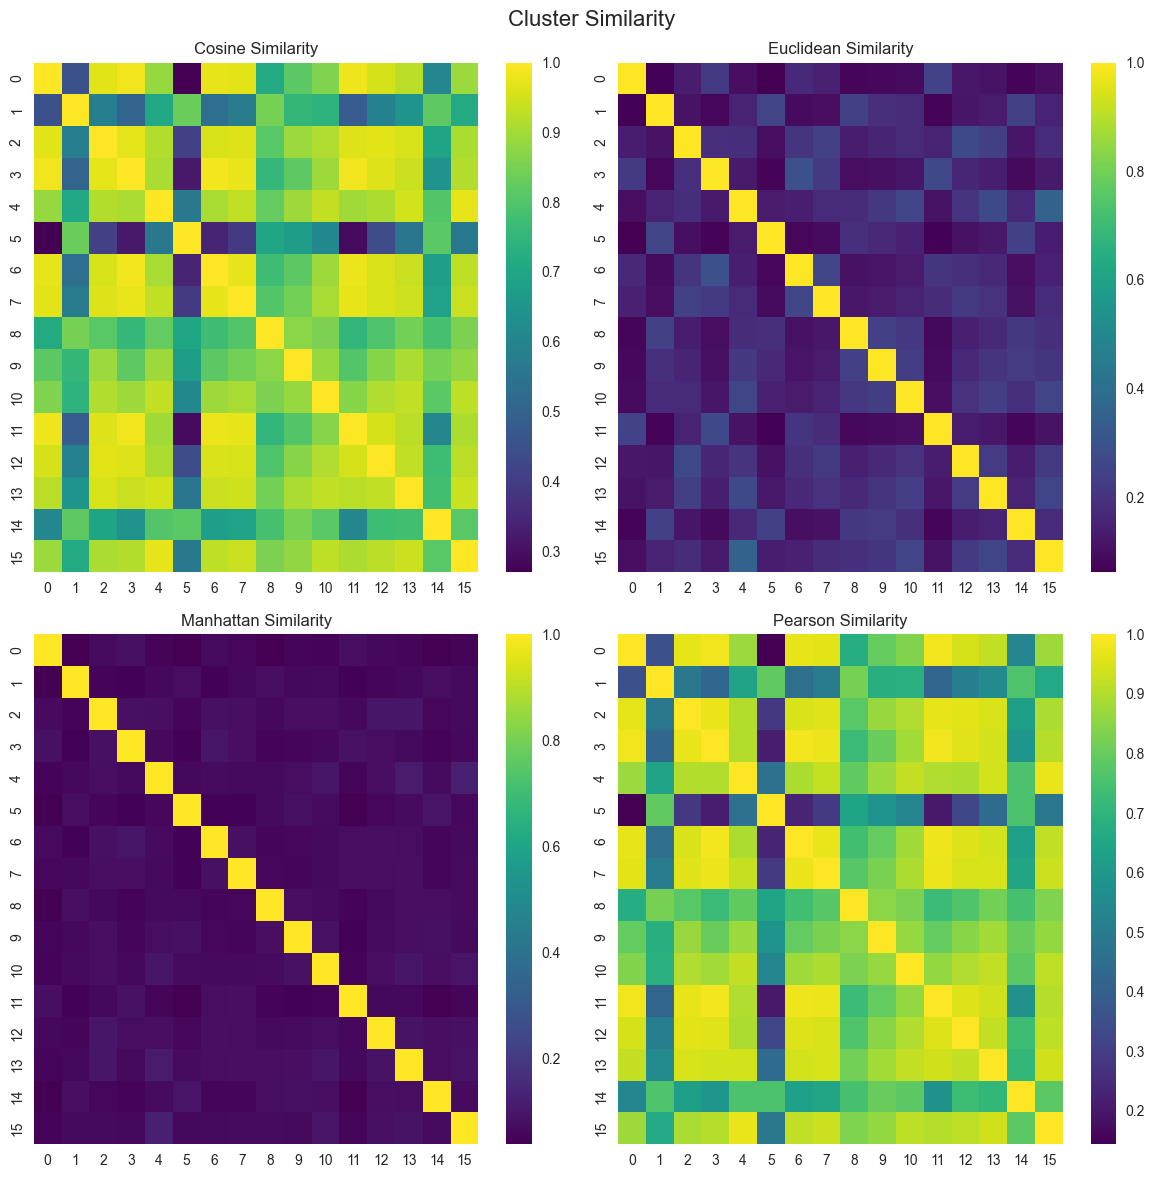

In [193]:
# Model 11:
dbscan = DBSCAN(eps=0.7, min_samples=10).fit(data_norm3)

labels = dbscan.labels_
data_norm3['cluster'] = labels
display(data_norm3.head())

print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_regression-score')
plt.show()

to_drop = X.columns[scores < 10]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

### Model 11:

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         0  
1        -1  
2        -1  
3        -1  
4        -1

-1    75037
 0    22943
 1       20
Name: cluster, dtype: int64


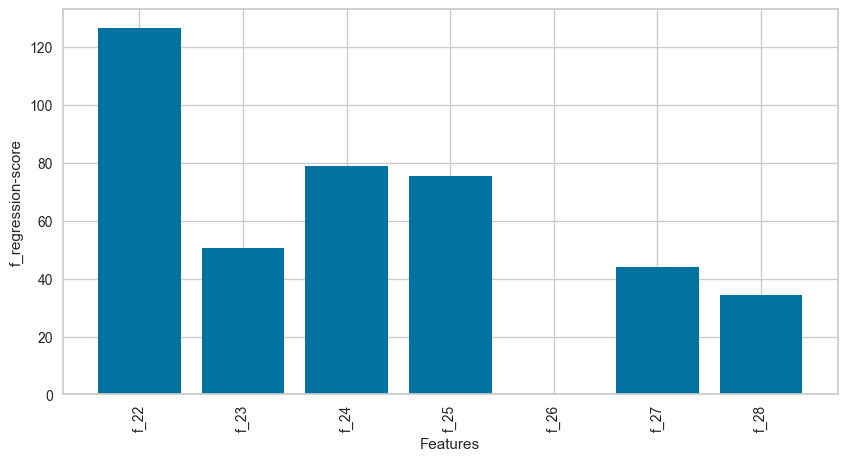

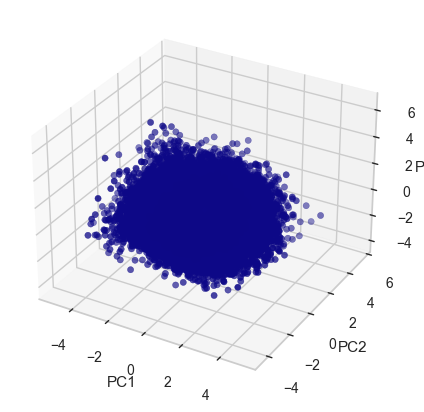

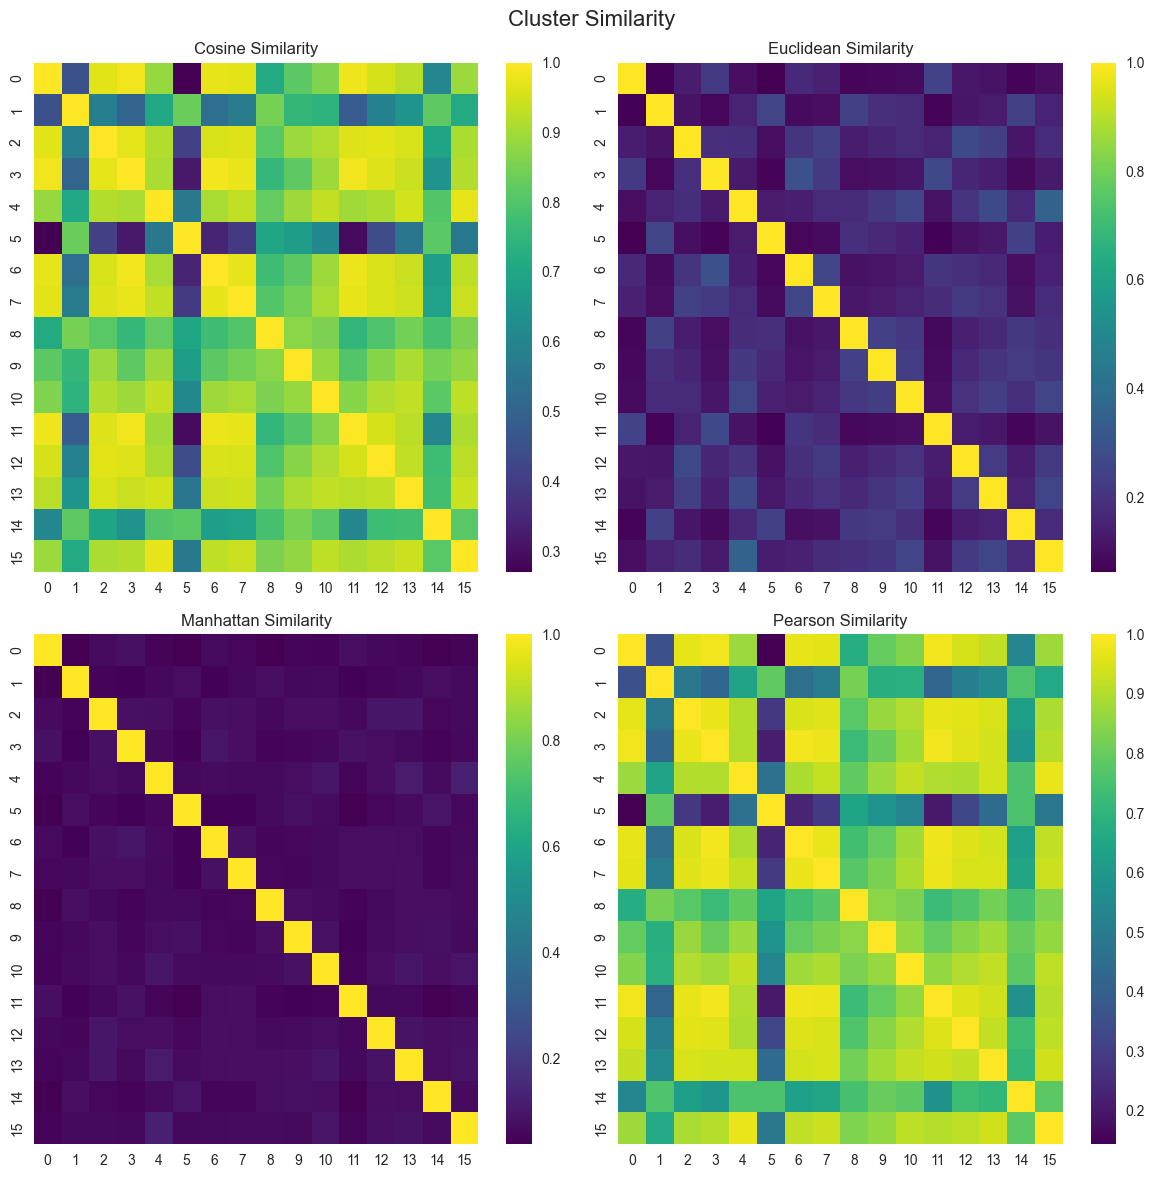

In [200]:
# Model 11: DBSCAN clustering with eps=0.5 and min_samples=20
dbscan = DBSCAN(eps=0.7, min_samples=30).fit(data_norm3)

labels = dbscan.labels_
data_norm3['cluster'] = labels
display(data_norm3.head())

print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_regression-score')
plt.show()

to_drop = X.columns[scores < 50]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

### Model 12:

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         0  
1        -1  
2        -1  
3         1  
4        -1

-1       71007
 0       15824
 110        41
 617        27
 247        22
         ...  
 866         3
 1596        3
 839         3
 1306        3
 2530        3
Name: cluster, Length: 2599, dtype: int64


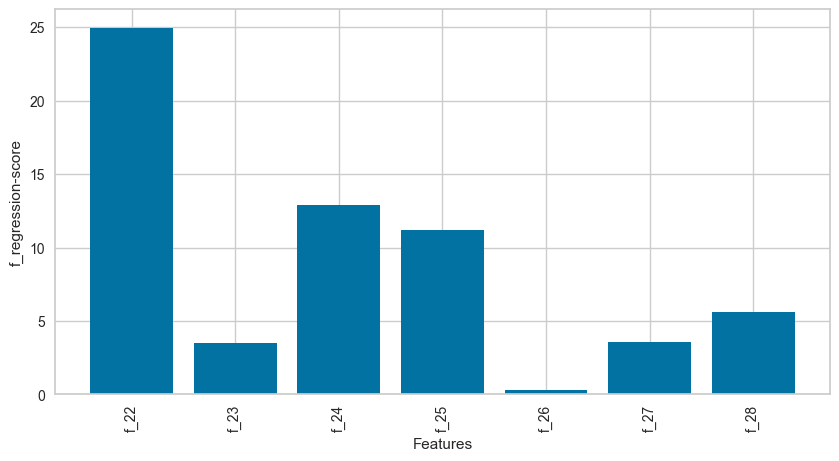

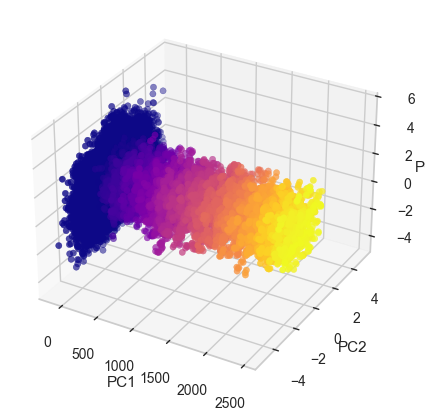

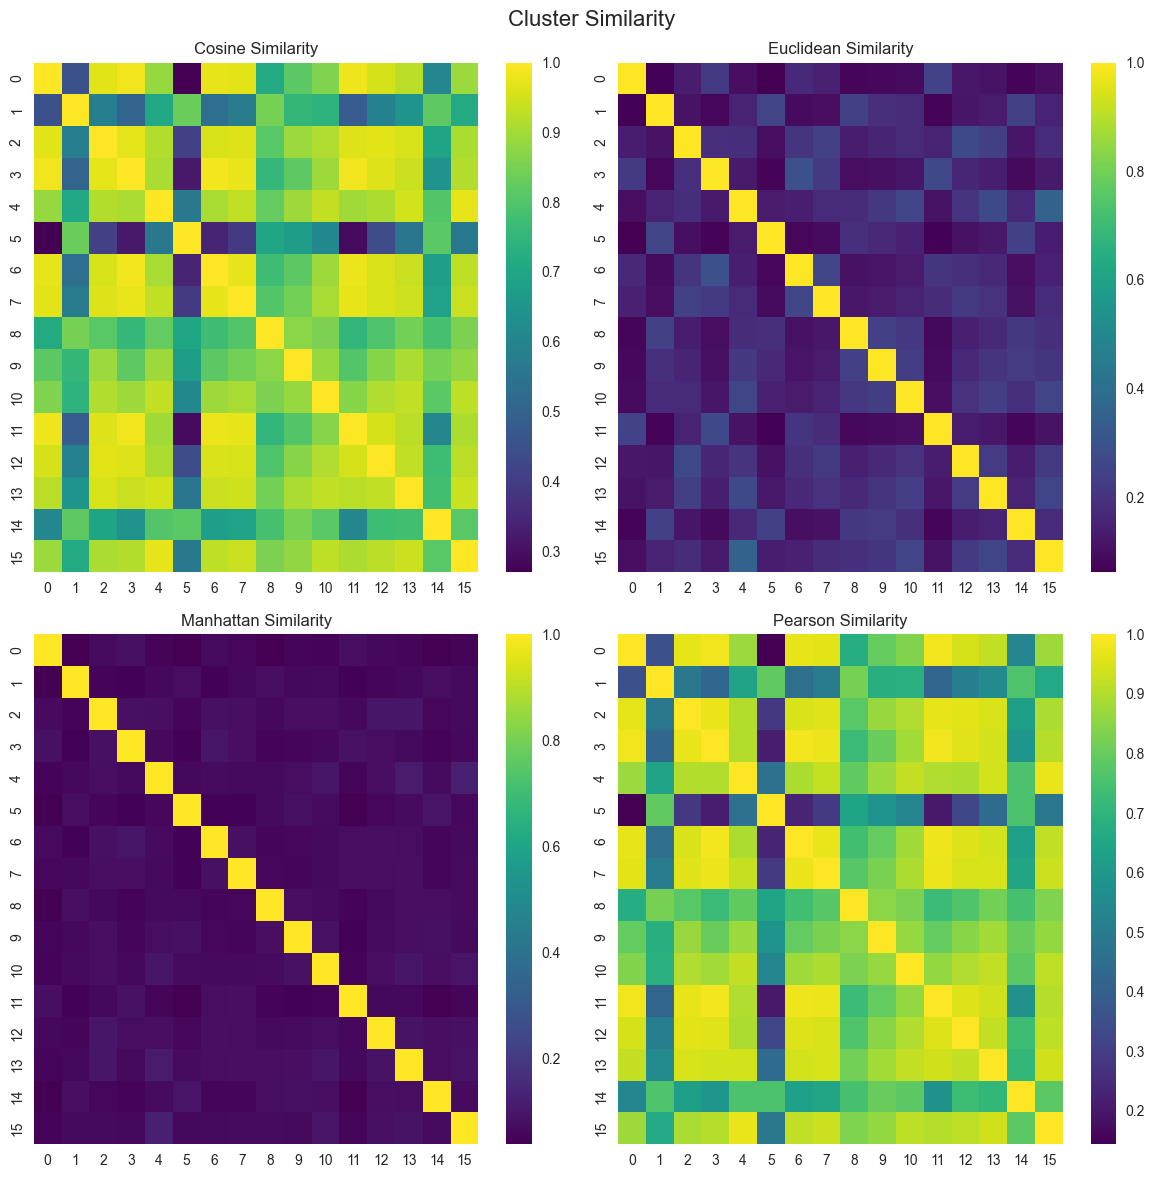

In [201]:
# Model 12: DBSCAN clustering with eps=0.5 and min_samples=3
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(data_norm3)
labels = dbscan.labels_
data_norm3['cluster'] = labels
display(data_norm3.head())

print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_regression-score')
plt.show()

to_drop = X.columns[scores < 0.01]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

We can choose also different metric -> used to calculate distances between data points.

Different distance metrics can capture different notions of similarity or dissimilarity between data points. For example, 
- Euclidean distance is suitable for continuous numerical data, 
- while cosine similarity is often used for text or high-dimensional sparse data.

Our data is mainly continuous, and default metric is "Euclidean", so there is not need to change it. 

Apart from that we can try different algorithms:
- auto: This option automatically chooses the most appropriate algorithm based on the characteristics of the input data. It generally performs well for most cases.
- ball_tree: This algorithm is based on the ball tree data structure and is efficient for higher-dimensional data. It can provide faster clustering for large datasets with many dimensions.

After reading about them, I think we can give a chance to ball_tree algorithm.

### Model 13:

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         0  
1        -1  
2        -1  
3        -1  
4        -1

-1      84403
 0      10608
 2         40
 16        27
 77        23
        ...  
 253        3
 460        3
 222        2
 245        2
 448        2
Name: cluster, Length: 493, dtype: int64


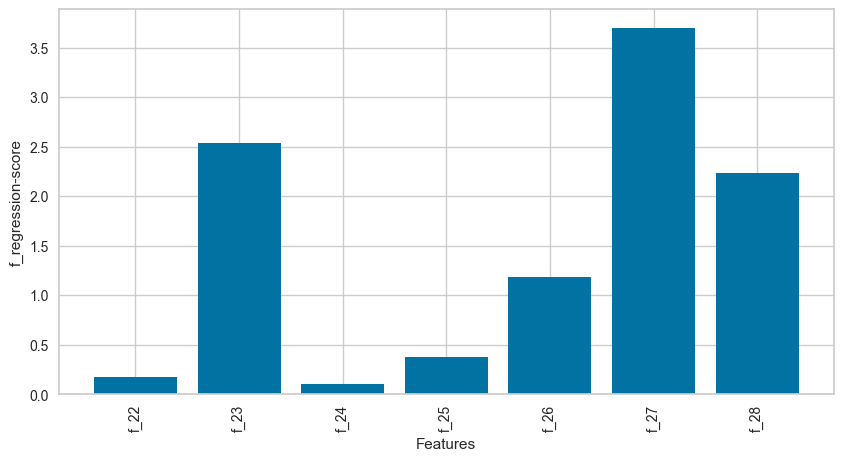

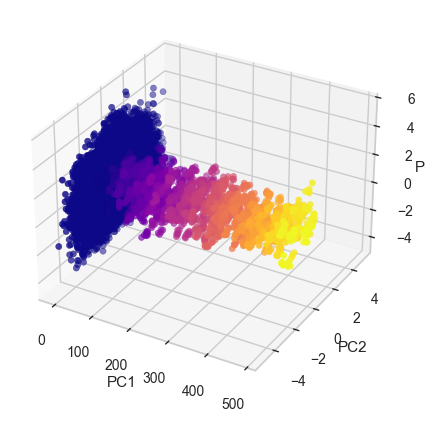

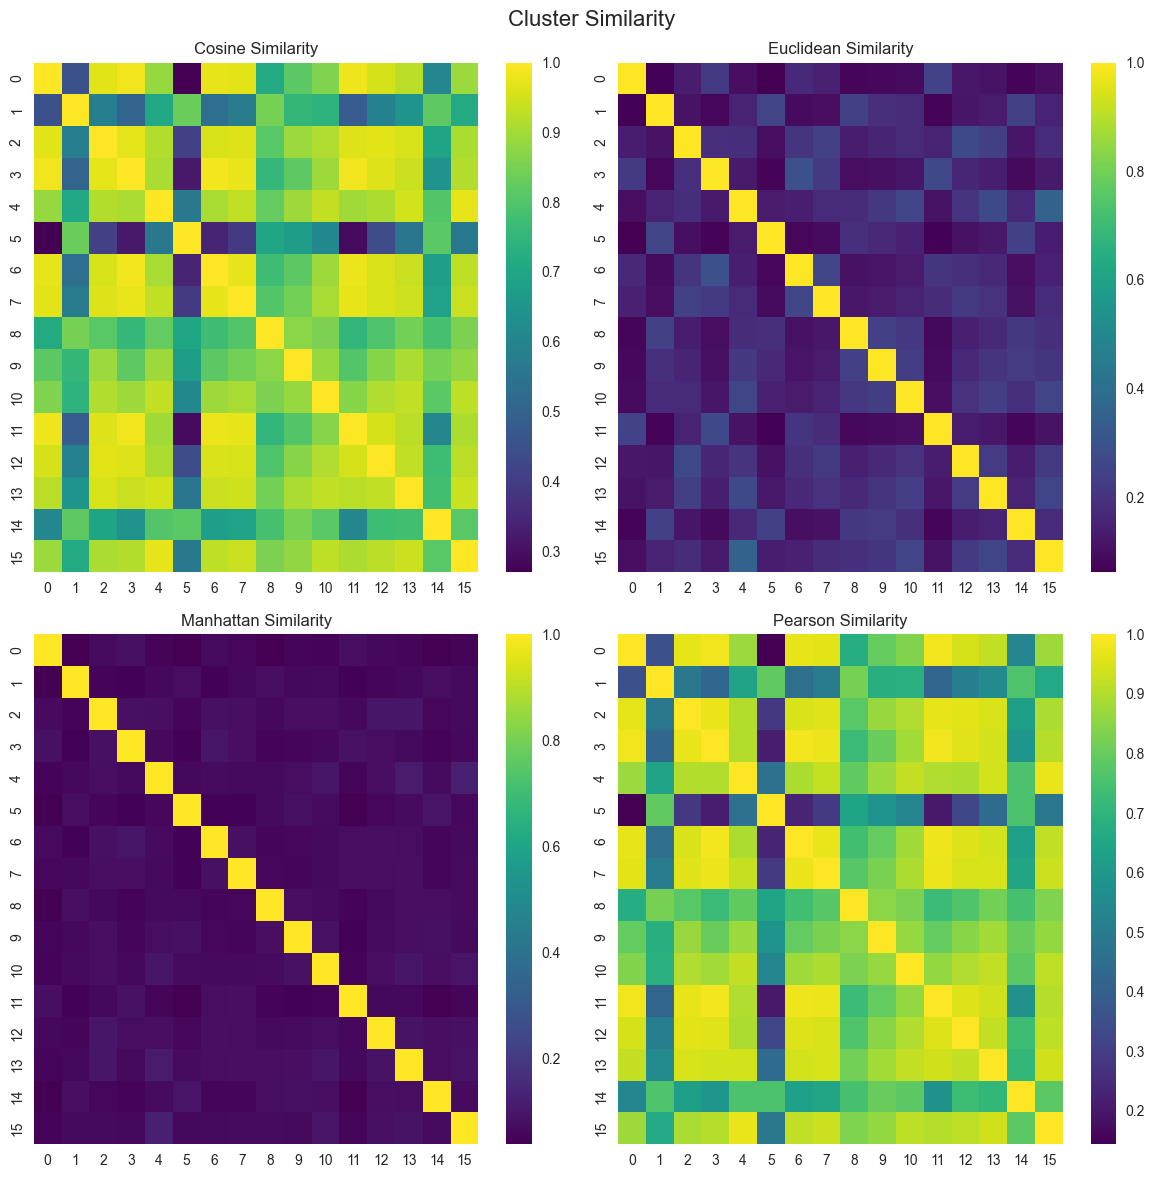

In [202]:
# Model 13: DBSCAN clustering with default parameters and algorithm='ball_tree'
dbscan = DBSCAN(eps=0.5, min_samples=5, algorithm='ball_tree').fit(data_norm3)

labels = dbscan.labels_
data_norm3['cluster'] = labels
display(data_norm3.head())

print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores, sth = f_regression(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('f_regression-score')
plt.show()

to_drop = X.columns[scores < 0.01]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

We would consider also different leaf_size
- Smaller leaf_size values can result in faster construction of the BallTree but may require more memory.
- Larger leaf_size values reduce memory consumption but can lead to slower performance.

As, we learned that we can get better results with using BallTree algorithm, we want to try it out. 

f_22      f_23      f_24      f_25      f_26      f_27      f_28  \
id                                                                         
0  -0.711582  0.911568 -0.680945  0.762779  0.960477  1.045291  0.683319   
1  -0.541812  0.454691  1.032381 -0.133947 -0.552939  0.355433 -1.602663   
2   2.236932  0.088090 -1.513317 -0.577812  0.979166 -0.926245 -2.224316   
3   0.727663 -1.218746  0.825694 -1.164836 -0.397906 -0.114228  0.307001   
4   0.218613 -1.484018  0.847365 -0.622031  1.166080 -0.385884 -1.149088   

    cluster  
id           
0         3  
1         2  
2         1  
3         0  
4         2

2     10271
5      7646
7      7556
4      7475
0      7133
15     6908
10     6668
1      6566
13     6334
6      5473
12     5165
3      5047
8      4956
14     4122
11     3508
9      3172
Name: cluster, dtype: int64


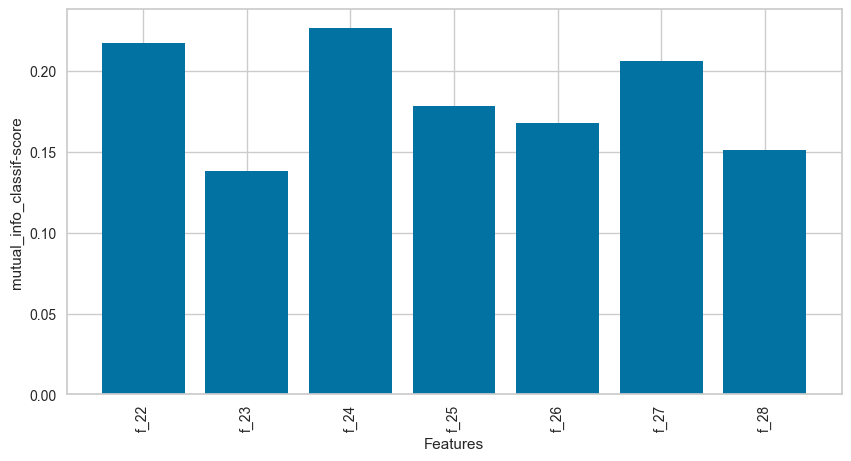

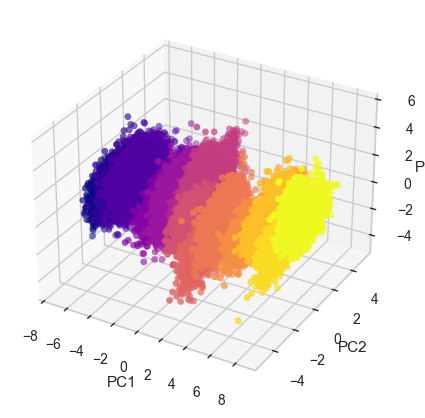

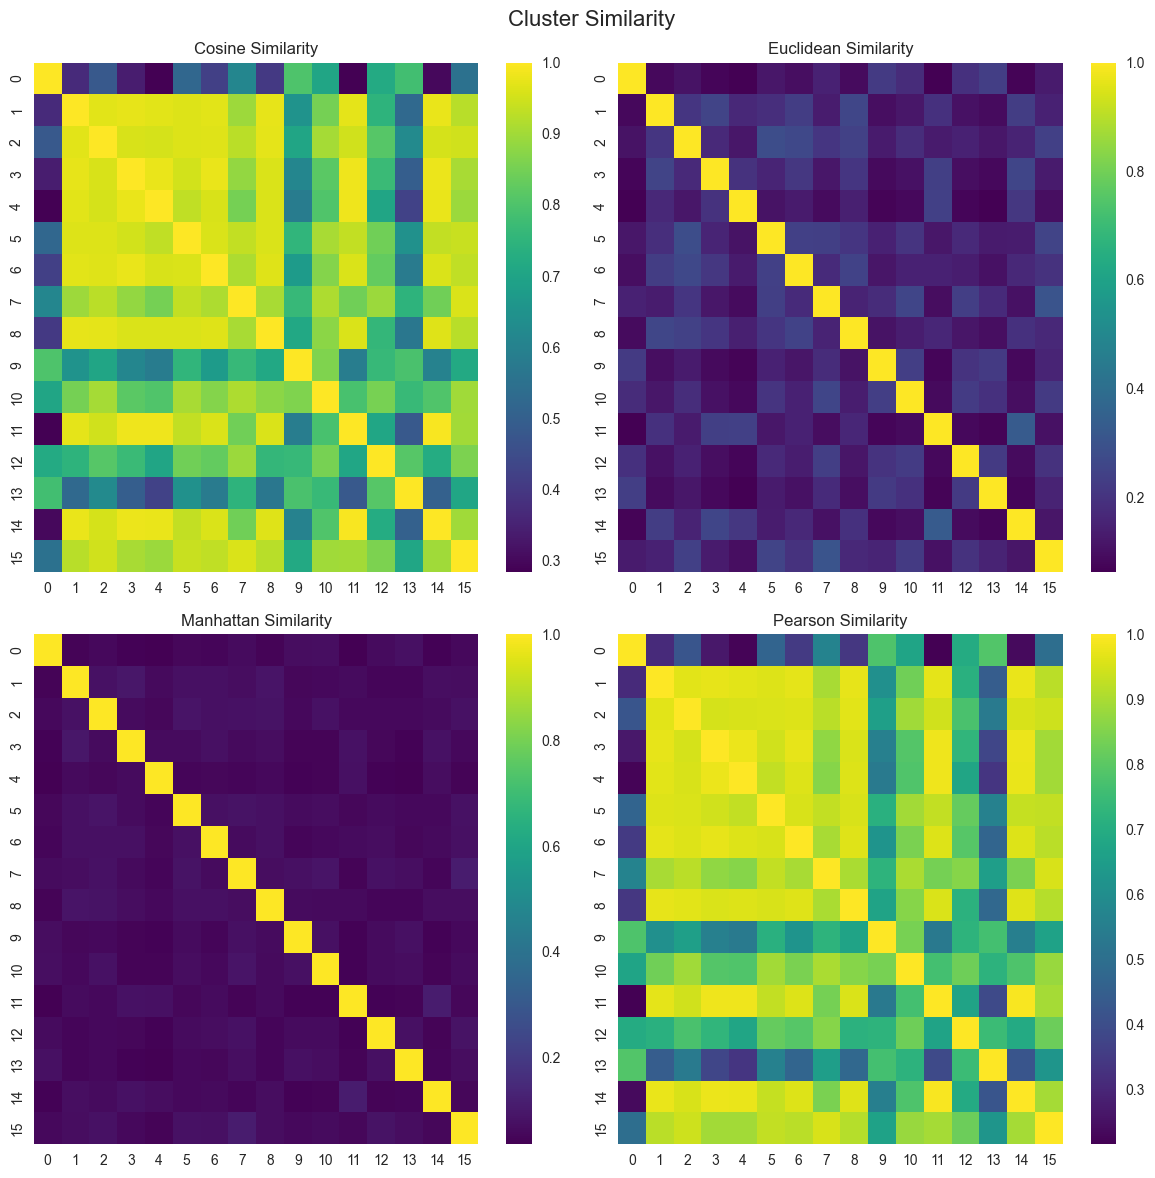

In [216]:
# Model 14: DBSCAN clustering with default parameters and algorithm='ball_tree' and leaf_size=10 (default=30)
dbscan = DBSCAN(eps=0.5, min_samples=5, algorithm='ball_tree', leaf_size=10).fit(data_norm3)

labels = kmeans.labels_
data_norm3['cluster'] = labels
display(data_norm3.head())
print(data_norm3['cluster'].value_counts())

X = data_norm3.drop(['cluster'], axis=1)
y = data_norm3['cluster']

scores = mutual_info_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('mutual_info_classif-score')
plt.show()

to_drop = X.columns[scores < 0.01]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm3)
pca_data = pd.DataFrame(pca.transform(data_norm3))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

### Model 15:

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319       15  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663        0  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316        5  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001        3  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088        0  

[5 rows x 30 columns]

2     10271
5      7646
7      7556
4      7475
0      7133
15     6908
10     6668
1      6566
13     6334
6      5473
12     5165
3      5047
8      4956
14     4122
11     3508
9      3172
Name: cluster, dtype: int64


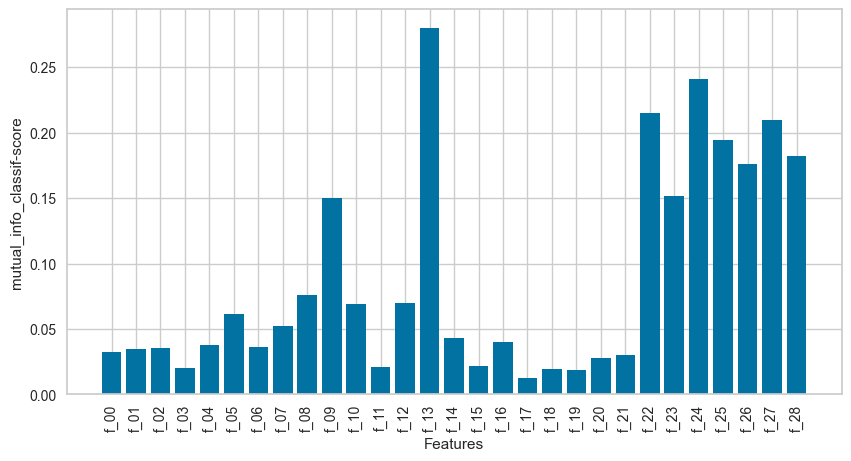

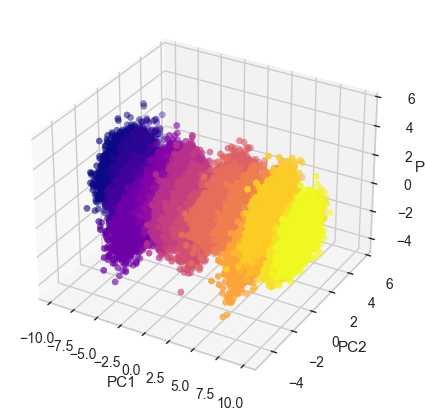

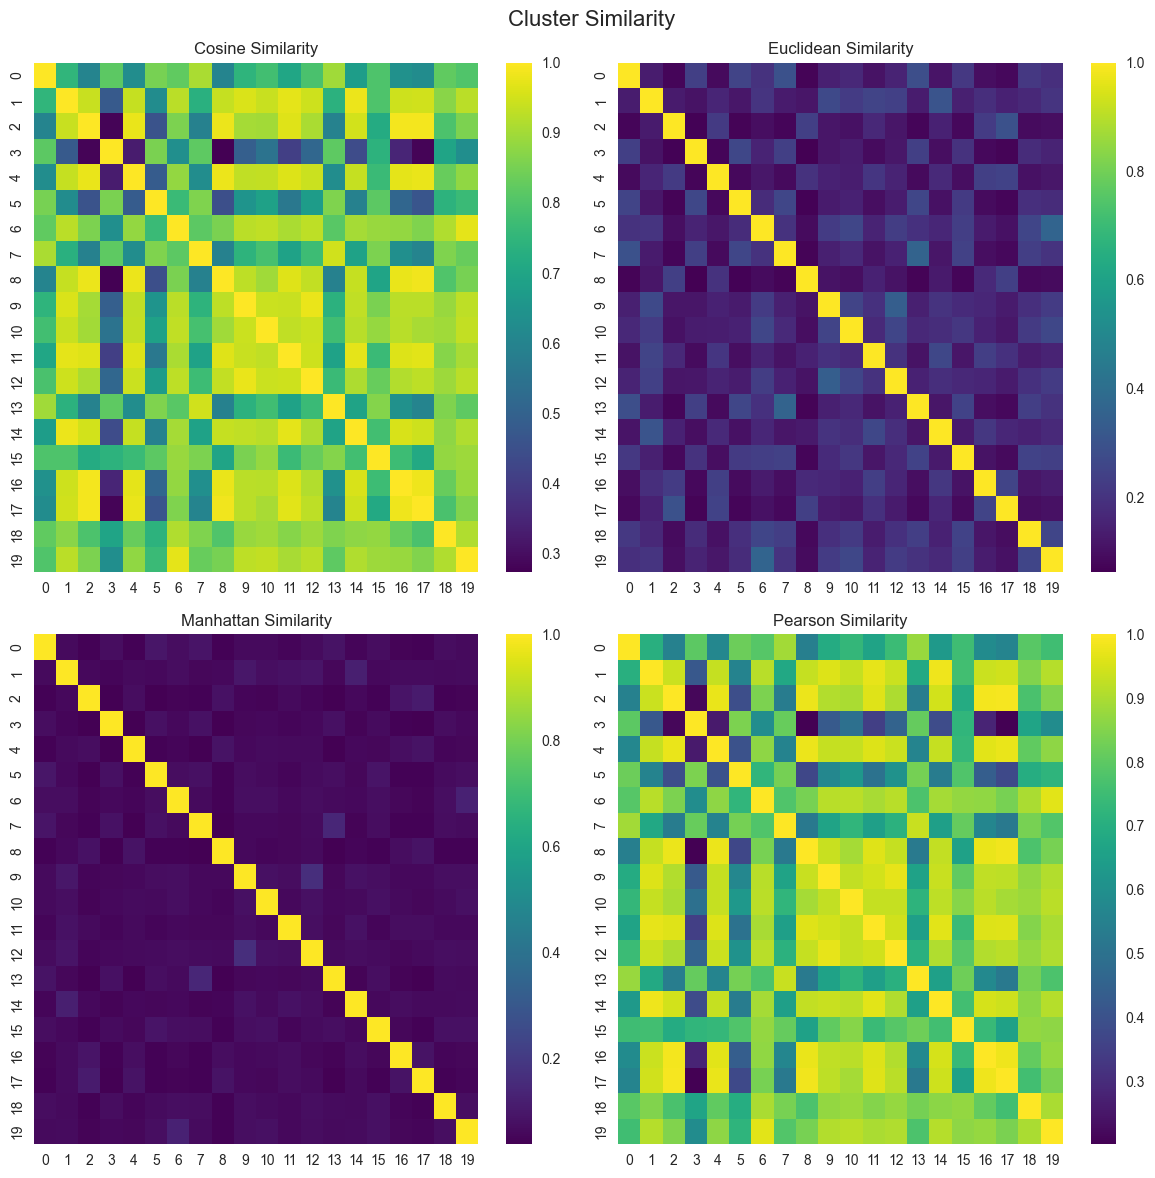

In [217]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(data_norm)

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head())
print(data_norm3['cluster'].value_counts())

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores = mutual_info_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('mutual_info_classif-score')
plt.show()

to_drop = X.columns[scores < 0.01]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

As so far, The best model by far.

### Model 16:

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
id                                                                         
0  -0.389549 -0.917690  0.649102  0.589496 -0.824771  0.734845  2.267421   
1  -0.688540 -0.459192  0.654318  0.995528 -1.644464  0.864962 -0.087835   
2   0.805603  0.318752 -1.167957 -0.623528  0.108638  0.785142  1.996466   
3  -0.500741  0.223304  0.264787  0.232122  0.417256 -1.219009  0.142256   
4  -0.670609 -1.044337 -0.268744 -1.828792 -0.285712 -1.850213  0.786959   

        f_07      f_08      f_09  ...      f_20      f_21      f_22      f_23  \
id                                ...                                           
0   1.098612  2.639057  2.708050  ... -0.754253 -0.762191 -0.711582  0.911568   
1   1.098612  1.386294  1.945910  ... -0.089129 -1.783064 -0.541812  0.454691   
2   1.791759  2.484907  1.791759  ... -1.597131  1.193009  2.236932  0.088090   
3   1.945910  1.098612  2.639057  ...  1.284511  0.534666  0.727663 -1.218746   
4   2.197225  2.079442  1.791759  ... -0.433149  0.324271  0.218613 -1.484018   

        f_24      f_25      f_26      f_27      f_28  cluster  
id                                                             
0  -0.680945  0.762779  0.960477  1.045291  0.683319       19  
1   1.032381 -0.133947 -0.552939  0.355433 -1.602663       11  
2  -1.513317 -0.577812  0.979166 -0.926245 -2.224316       18  
3   0.825694 -1.164836 -0.397906 -0.114228  0.307001       22  
4   0.847365 -0.622031  1.166080 -0.385884 -1.149088       11  

[5 rows x 30 columns]

2     10271
5      7646
7      7556
4      7475
0      7133
15     6908
10     6668
1      6566
13     6334
6      5473
12     5165
3      5047
8      4956
14     4122
11     3508
9      3172
Name: cluster, dtype: int64


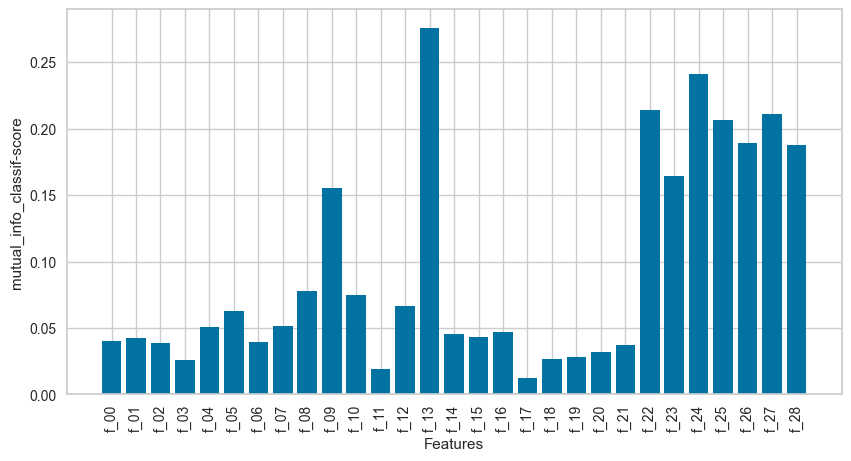

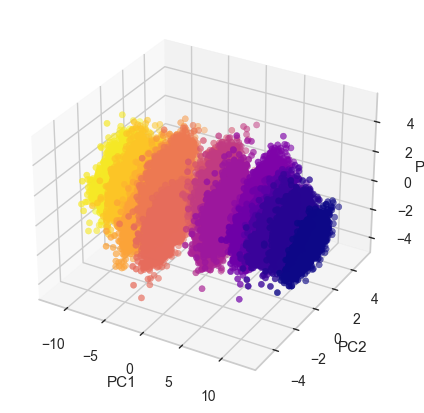

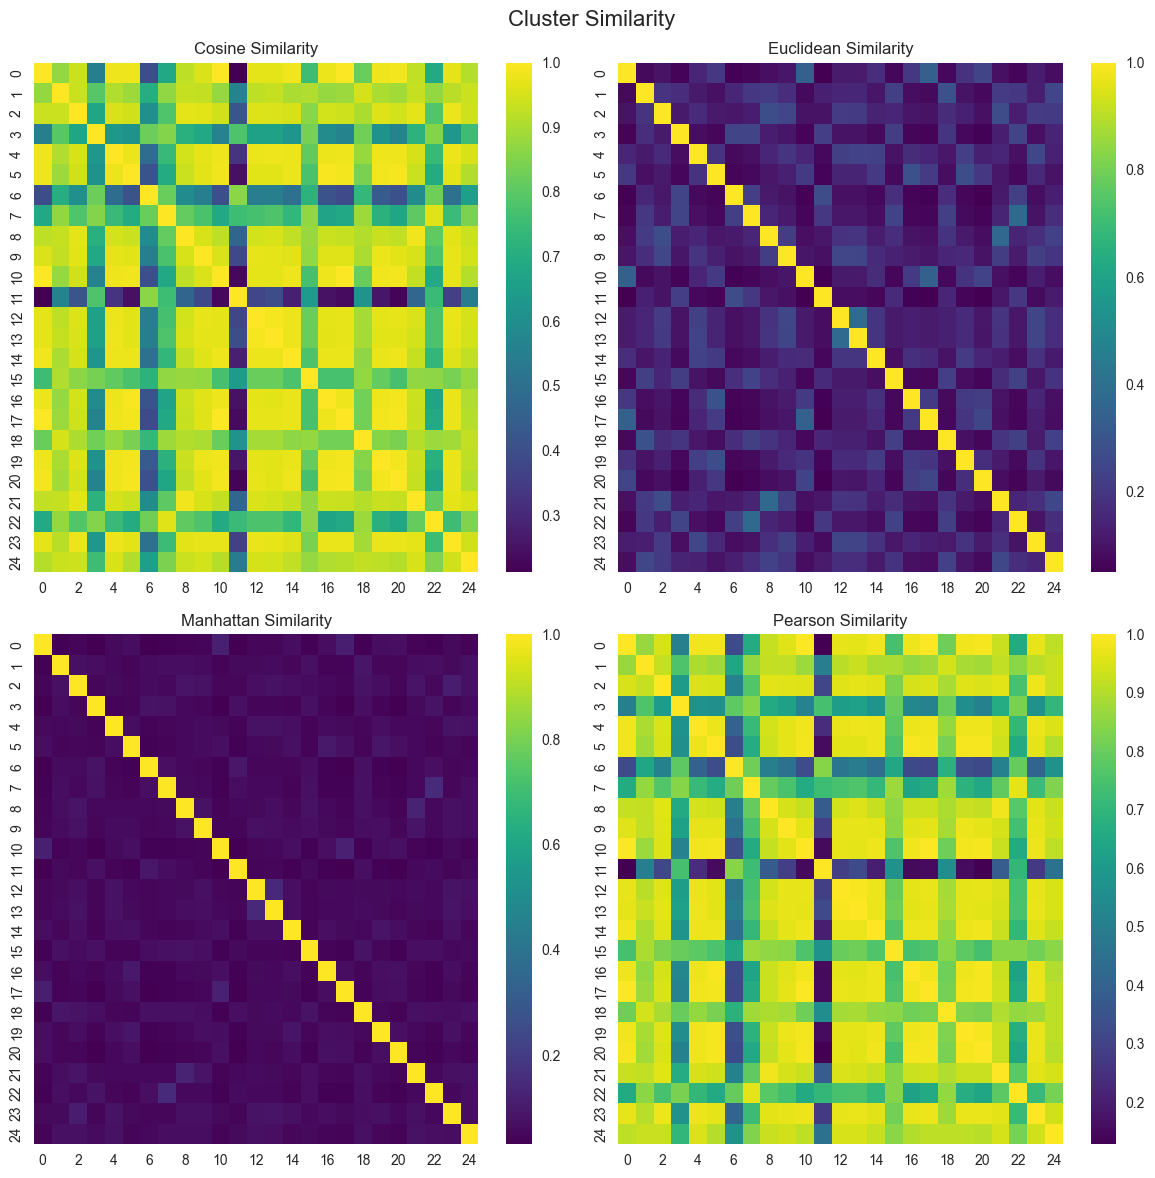

In [218]:
kmeans = KMeans(n_clusters=25, random_state=0, tol=0.00001).fit(data_norm)

labels = kmeans.labels_
data_norm['cluster'] = labels
display(data_norm.head())
print(data_norm3['cluster'].value_counts())

X = data_norm.drop(['cluster'], axis=1)
y = data_norm['cluster']

scores = mutual_info_classif(X, y)

# visualizing the scores in bar plot

plt.figure(figsize=(10, 5))
plt.bar(X.columns, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('mutual_info_classif-score')
plt.show()

to_drop = X.columns[scores < 0.01]
X_to_print = X.drop(to_drop, axis=1)
# print(to_drop)

pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pd.DataFrame(pca.transform(data_norm))
pca_data.columns = ['PC1', 'PC2', 'PC3']
pca_data['cluster'] = labels

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

visualize_cluster_similarity(kmeans)

Looking at this plot, we can decide that 12 features seems to be significantly more important than rest of them.

# Choosing the best model after all

Silhouette Score: The silhouette score measures how well each sample fits into its assigned cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

Davies-Bouldin Index: This index quantifies the average similarity between clusters, where lower values indicate better separation between clusters.

Visual inspection: Visualizing the clustering results can provide valuable insights. Plotting the clusters in a 2D or 3D space can help assess their separation and compactness.

Considering all of the factors, we have chosen last model with the best distributed clusters and also indicated by Davies-Bouldin Index, as graph seemed to decrease.   

In [220]:
dataSubmission = {
    'Id': data_norm.index,
    'Predicted': data_norm3['cluster']
}

df = pd.DataFrame(dataSubmission)
df.to_csv('submission.csv', index=False)

In [221]:
display(df.head())

Id  Predicted
id               
0    0          3
1    1          2
2    2          1
3    3          0
4    4          2

In [222]:
display(data_norm3['cluster'].head())

id
0    3
1    2
2    1
3    0
4    2
Name: cluster, dtype: int32